# "Manpower EDA Version: 3.4"
> "50 New Insights and Analysis based on Manpower Data Version: 2.0"

- toc: true
- comments: false
- categories: [Kuwait, Man-power, Analysis]
- image: /images/MACHINE%20THINKING.png
- hide: false
- search_exclude: true
- metadata_key1: version-3.4

In [1]:
#hide_input
!pip install pyreadstat
!pip install --upgrade plotly

In [2]:
#hide_input

import operator
import pandas as pd
import numpy as np
from datetime import datetime, date
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

In [3]:
#hide_input

#Replacing df with data read from pickle file
#Start all other version from this cell, 

data = pd.read_pickle("DataManPowerV2.pkl")

data.columns

Index(['CIVIL_ID', 'Birth Date', 'Nationality', 'Gender', 'Religion',
       'Occupation', 'Economic Act', 'Educational Level', 'Salary',
       'Governorate', 'Marital Status', 'Company', 'Hire Date', 'جنسية',
       'Category', 'Age', 'Age Group'],
      dtype='object')

In [4]:
#hide_input

print("Total Unique Nationalities : ",len(data['Nationality'].unique()))

Total Unique Nationalities :  173


In [5]:
#hide_input

print("Total Unique Occupation : ",len(data['Occupation'].unique()))

Total Unique Occupation :  2285


In [6]:
#hide_input

print("Total Unique Companies : ",len(data['Company'].unique()))

Total Unique Companies :  122145


In [7]:
#hide_input

data.dtypes

CIVIL_ID                      int64
Birth Date           datetime64[ns]
Nationality                  object
Gender                       object
Religion                     object
Occupation                   object
Economic Act                 object
Educational Level            object
Salary                      float64
Governorate                  object
Marital Status               object
Company                      object
Hire Date            datetime64[ns]
جنسية                       float64
Category                     object
Age                         float64
Age Group                  category
dtype: object

## Insight 1 - Top 20 Kuwaiti Workforce Nationalities

In [8]:
#hide_input

a = dict(data['Nationality'].value_counts())
insight1 = pd.DataFrame()
a = dict(sorted(a.items(), key=operator.itemgetter(1), reverse=True)[:20])
insight1['Nationality'] = a.keys()
insight1['Total Count'] = a.values()
insight1['Percentage'] = ((insight1['Total Count'] / 1574040)*100).round(2)
#insight1 = insight1.sort_values("Nationality")
insight1['Percentage'] = insight1['Percentage'].astype(str) + '%'
insight1.style.background_gradient(cmap='Reds')

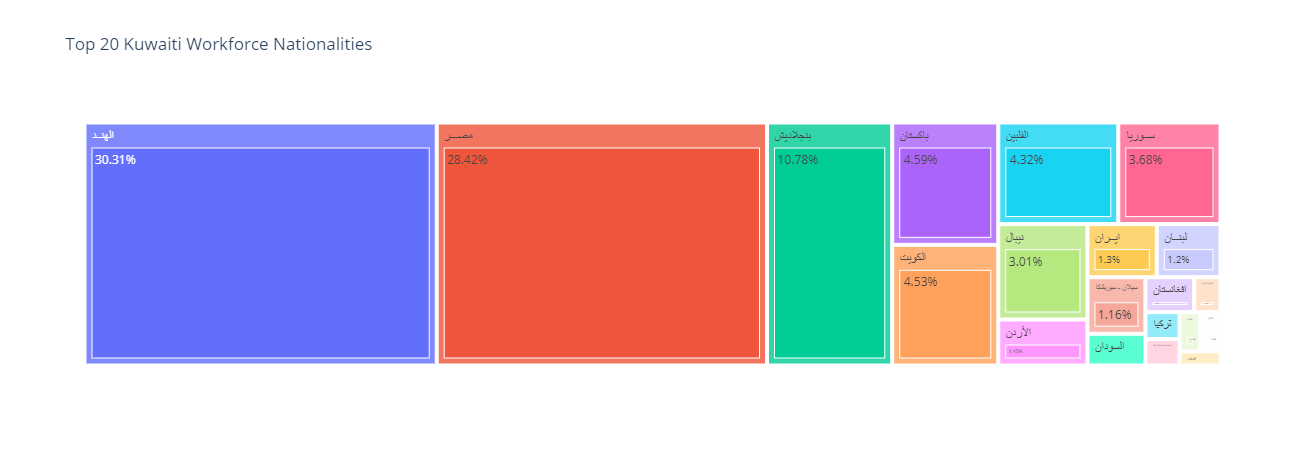

In [9]:
#hide_input

fig = px.treemap(insight1, path=['Nationality','Percentage'], values='Total Count',
                 title="Top 20 Kuwaiti Workforce Nationalities")
fig.show()

# Insight 2 : Workforce by Category

In [10]:
#hide_input

insight2 = pd.DataFrame()
b = dict(data.groupby("Category")['Category'].count())
insight2['Category'] = b.keys()
insight2['Total Count'] = b.values()
insight2['Percentage'] = ((insight2['Total Count'] / 1574040)*100).round(2) 
insight2['Percentage'] = insight2['Percentage'].astype(str) + '%'
insight2.style.background_gradient(cmap='Reds')

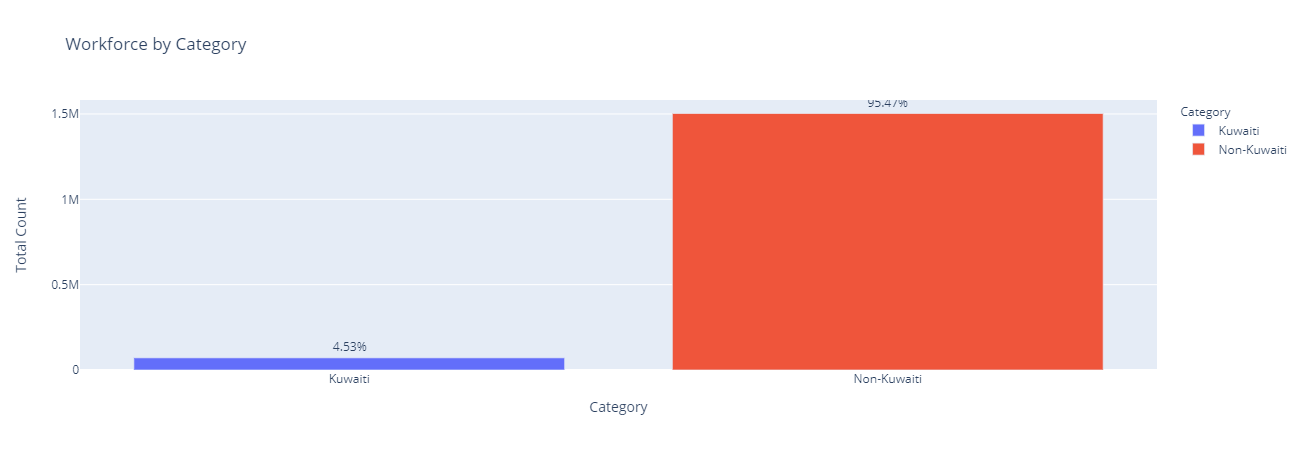

In [11]:
#hide_input

fig = px.bar(insight2, x="Category", y="Total Count", title ="Workforce by Category", color = "Category", text = "Percentage")
fig.update_traces(textposition='outside')
fig.show()

# Insight 3 : Top 20 Workforce Occupation

In [12]:
#hide_input

insight3 = pd.DataFrame()
c = dict(data.groupby("Occupation")['Occupation'].count())
insight3['Occupation'] = c.keys()
insight3['Total Count'] = c.values()
insight3['Percentage'] = ((insight3['Total Count'] / 1574040)*100).round(2) 
insight3['Percentage'] = insight3['Percentage'].astype(str) + '%'
insight3 = insight3.nlargest(20,'Total Count')
#insight3 = insight3.sort_values("Occupation")
insight3 = insight3.set_index("Occupation")
insight3.style.background_gradient(cmap='Reds')

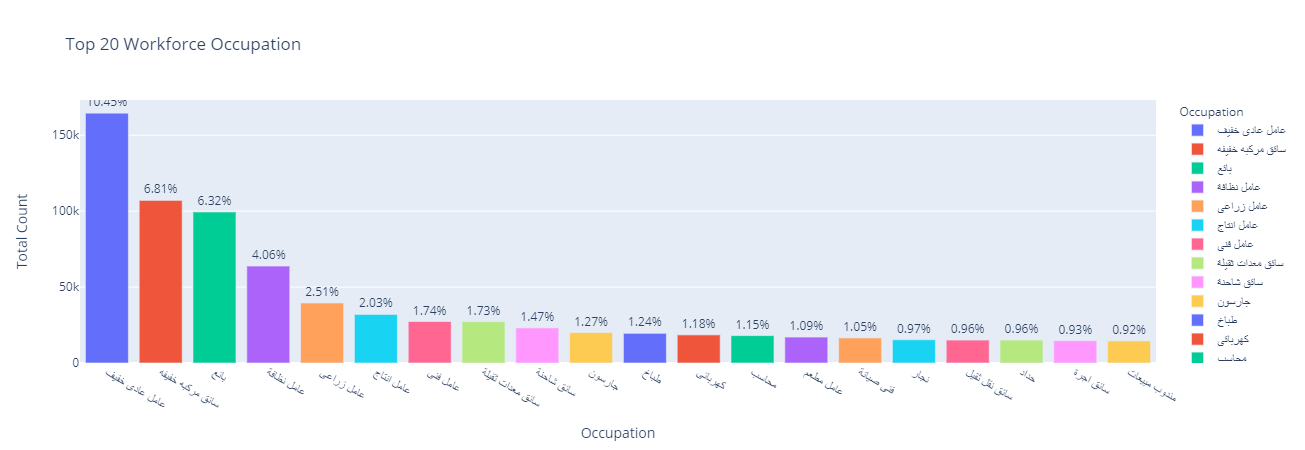

In [13]:
#hide_input

fig = px.bar(insight3, x=insight3.index, y="Total Count",title ="Top 20 Workforce Occupation",color = insight3.index,
             text = "Percentage")
fig.update_traces(textposition='outside')
fig.show()

# Insight 4 : Workforce Occupation by Category

KUWAITI VS NON-KUWAITI

In [14]:
#hide_input

data['COUNTER'] = 1
insight4 = data.groupby(['Occupation','Category'])['COUNTER'].agg(['count'])
insight4['Percentage'] = ((insight4['count'] / 1574040)*100).round(2) 
insight4['Percentage'] = insight4['Percentage'].astype(str) + '%'
#insight4 = insight4.sort_values('Occupation')
insight4.style.background_gradient(cmap='Reds')

In [15]:
#hide_input

insight4 = insight4.reset_index("Category")
kuwait_df = insight4[insight4['Category'] == 'Kuwaiti']
kuwait_df = kuwait_df.nlargest(10,'count')
kuwait_df.style.background_gradient(cmap='Reds')

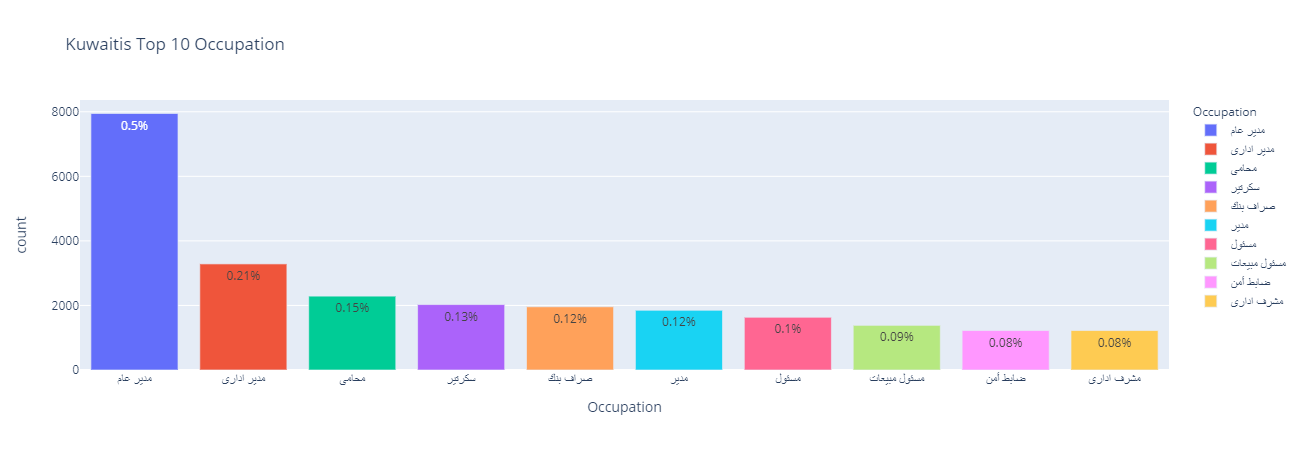

In [16]:
#hide_input

fig = px.bar(kuwait_df,x=kuwait_df.index, y="count", hover_data = kuwait_df.columns,color=kuwait_df.index,text="Percentage",
             title = "Kuwaitis Top 10 Occupation")
fig.show()

In [17]:
#hide_input

non_kuwait_df = insight4[insight4['Category'] == 'Non-Kuwaiti']
non_kuwait_df = non_kuwait_df.nlargest(10,'count')
non_kuwait_df.style.background_gradient(cmap='Reds')

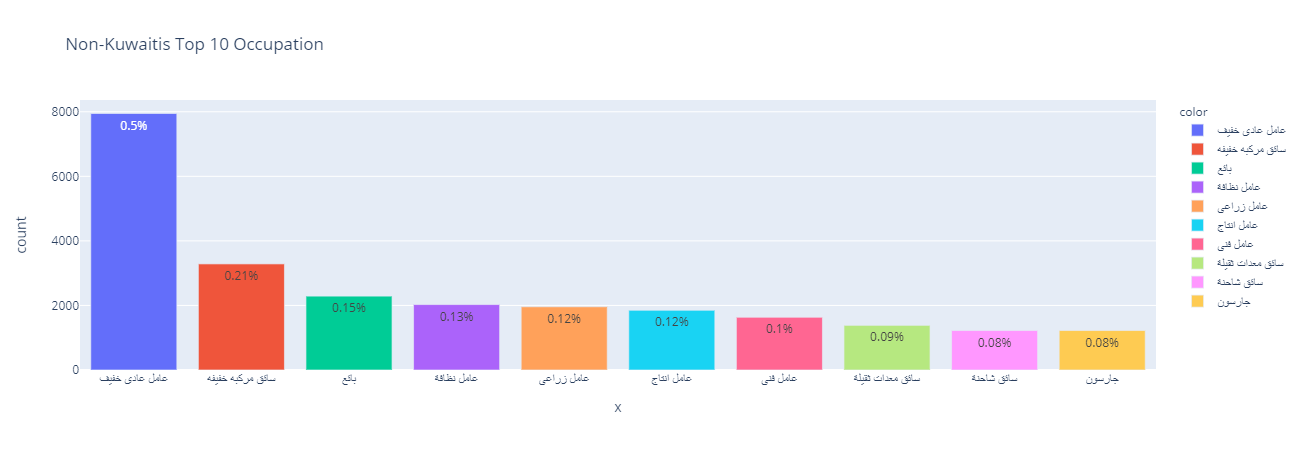

In [18]:
#hide_input

fig = px.bar(kuwait_df,x=non_kuwait_df.index, y="count", hover_data = non_kuwait_df.columns,color=non_kuwait_df.index,
             title = "Non-Kuwaitis Top 10 Occupation",text="Percentage")
fig.show()

## Insight 5 - Top 20 Occupations by Nationality

In [19]:
#hide_input

data['COUNTER'] = 1 #initially, set that counter to 1.
insight5 = data.groupby(['Occupation','Nationality'])['COUNTER'].agg(['count'])
insight5['Percentage'] = ((insight5['count'] / 1574040)*100).round(2)
insight5['Percentage'] = insight5['Percentage'].astype(str) + '%'
insight5 = insight5.nlargest(20,'count')
insight5.style.background_gradient(cmap='Reds')

In [20]:
#hide_input

insight5 = insight5.sort_values(by=['Percentage', 'Occupation', 'Nationality'])
insight5 = insight5.reset_index()

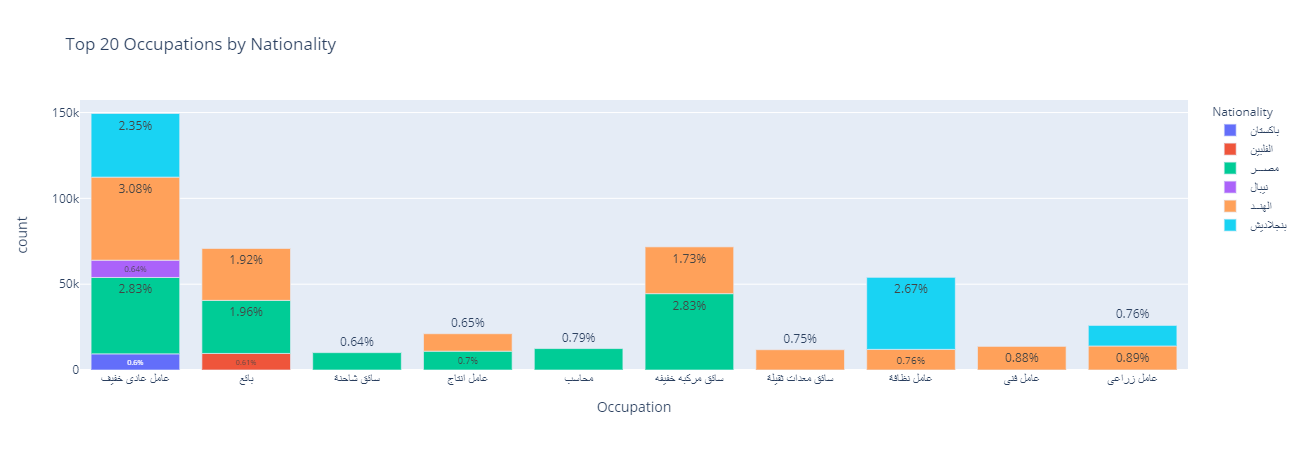

In [21]:
#hide_input

fig = px.bar(insight5, text="Percentage",x="Occupation", y="count", color='Nationality',
             title = "Top 20 Occupations by Nationality")
fig.show()

# Insight 6 : Top 20 Age Group by Occupation

In [22]:
#hide_input

data['COUNTER'] = 1
insight6 = data.groupby(['Occupation','Age Group'])['COUNTER'].agg(['count'])
insight6['Percentage'] = ((insight6['count'] / 1574040)*100).round(2) 
insight6['Percentage'] = insight6['Percentage'].astype(str) + '%'
insight6 = insight6.reset_index("Occupation")
insight6 = insight6.sort_values('Occupation')
insight6 = insight6.nlargest(20,'count')
insight6

Occupation  count Percentage
Age Group                                    
46-50        عامل عادى خفيف  33104       2.1%
36-40        عامل عادى خفيف  32487      2.06%
36-40      سائق مركبه خفيفه  25557      1.62%
41-45        عامل عادى خفيف  23485      1.49%
36-40                  بائع  20903      1.33%
31-35        عامل عادى خفيف  19250      1.22%
46-50      سائق مركبه خفيفه  18966       1.2%
56-60        عامل عادى خفيف  18741      1.19%
46-50                  بائع  17148      1.09%
51-55        عامل عادى خفيف  16320      1.04%
41-45      سائق مركبه خفيفه  16290      1.03%
31-35      سائق مركبه خفيفه  15607      0.99%
36-40            عامل نظافة  14853      0.94%
41-45                  بائع  13824      0.88%
31-35                  بائع  13776      0.88%
46-50            عامل نظافة  13458      0.85%
31-35            عامل نظافة  11223      0.71%
36-40            عامل زراعى  10384      0.66%
56-60                  بائع   9617      0.61%
56-60      سائق مركبه خفيفه   9015      0.57%

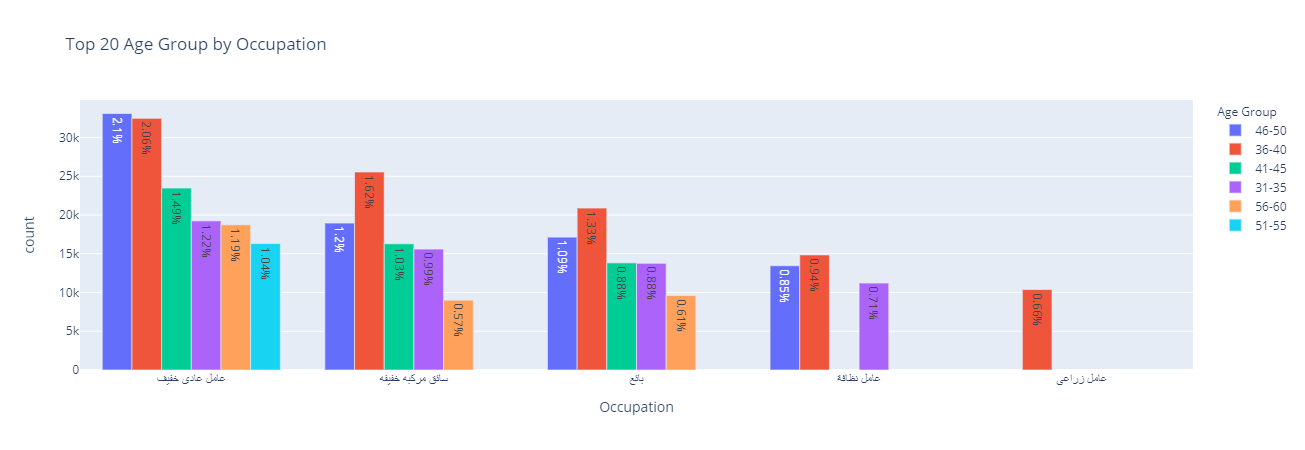

In [23]:
#hide_input

fig = px.bar(insight6, text="Percentage", x="Occupation", y="count", color=insight6.index, barmode='group',
             title = "Top 20 Age Group by Occupation")

fig.show()

# Insight 7 : Top 20 Occupation by Educational Level

In [24]:
#hide_input

data['COUNTER'] = 1
insight7 = data.groupby(['Occupation','Educational Level'])['COUNTER'].agg(['count'])
insight7['Percentage'] = ((insight7['count'] / 1574040)*100).round(2) 
insight7['Percentage'] = insight7['Percentage'].astype(str) + '%'
insight7 = insight7.reset_index("Educational Level")
insight7 = insight7.nlargest(20,'count')
insight7

Educational Level  count Percentage
Occupation                                          
عامل عادى خفيف               متوسط  91165      5.79%
سائق مركبه خفيفه             متوسط  71227      4.53%
بائع                         متوسط  63144      4.01%
عامل نظافة                   متوسط  40627      2.58%
عامل عادى خفيف              ثانوية  39894      2.53%
عامل زراعى                   متوسط  29771      1.89%
بائع                        ثانوية  25784      1.64%
سائق مركبه خفيفه            ثانوية  22360      1.42%
عامل عادى خفيف             ابتدائي  21684      1.38%
عامل انتاج                   متوسط  19655      1.25%
سائق شاحنة                   متوسط  16285      1.03%
سائق معدات ثقيلة             متوسط  14827      0.94%
محاسب                        جامعى  14136       0.9%
عامل فنى                     متوسط  13513      0.86%
عامل مطعم                    متوسط  12025      0.76%
سائق اجرة                    متوسط  11112      0.71%
عامل نظافة                 ابتدائي  10684      0.68%
كهربائى                      متوسط  10643      0.68%
جارسون                       متوسط  10442      0.66%
طباخ                         متوسط  10418      0.66%

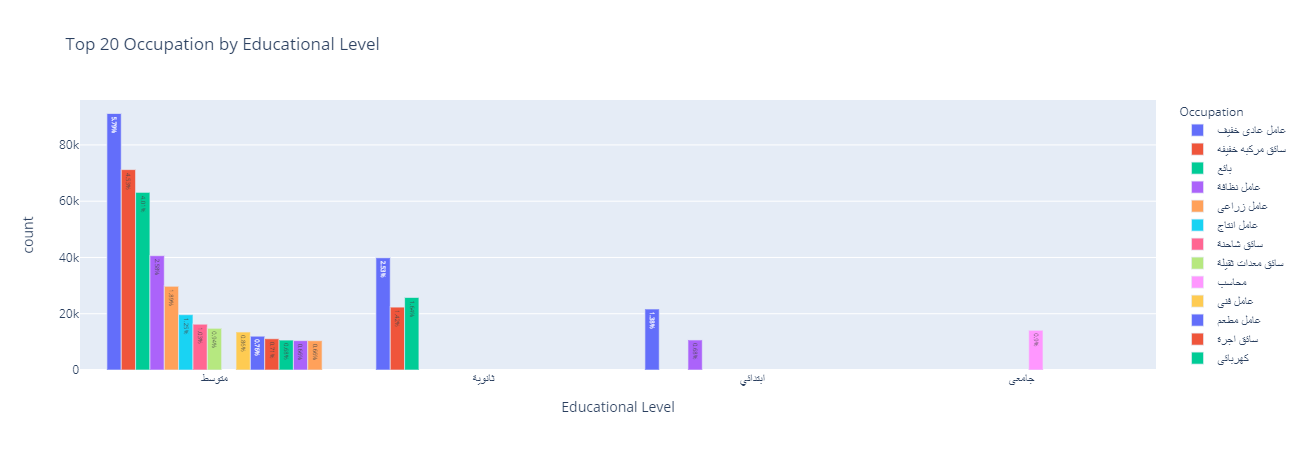

In [25]:
#hide_input

fig = px.bar(insight7, x="Educational Level", y="count", color=insight7.index,barmode='group', text="Percentage",
             title = "Top 20 Occupation by Educational Level")
fig.show()

# Insight 8: Work Force by Age Group

In [26]:
#hide_input

a = dict(data['Age Group'].value_counts())
insight8 = pd.DataFrame()
a = dict(sorted(a.items(), key=operator.itemgetter(1), reverse=True)[:20])
insight8['Age Group'] = a.keys()
insight8['Total Count'] = a.values()
insight8['Percentage'] = ((insight8['Total Count'] / 1574040)*100).round(2) 
insight8['Percentage'] = insight8['Percentage'].astype(str) + '%'
insight8 = insight8.sort_values("Age Group")
insight8.style.background_gradient(cmap='Reds')

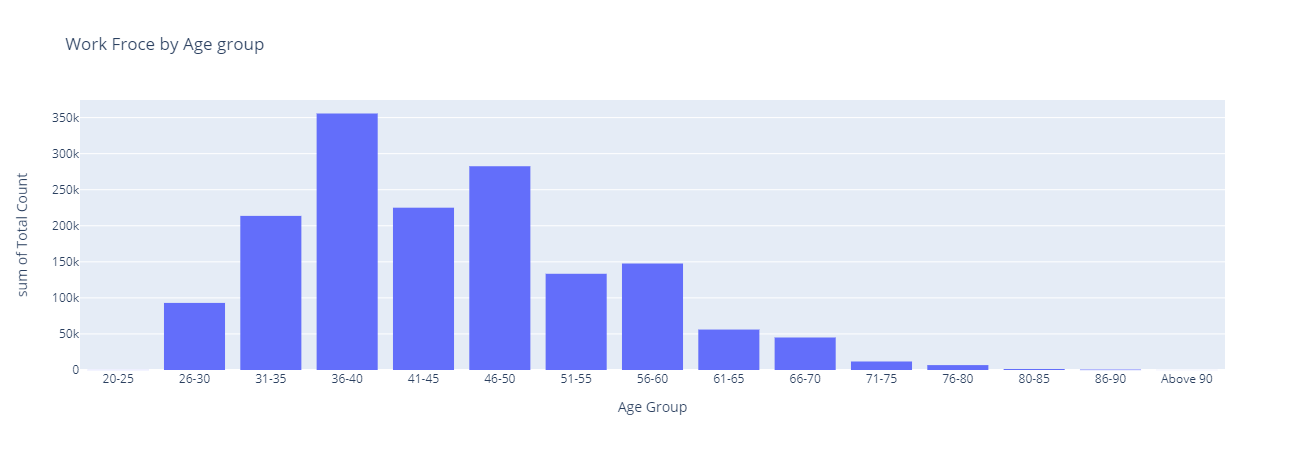

In [27]:
#hide_input

fig = px.histogram(insight8, x="Age Group", y= "Total Count",title ="Work Froce by Age group")
fig.show()

# Insight 9 : Top 20 Age Group by Nationality

In [28]:
#hide_input

data['COUNTER'] = 1
insight9 = data.groupby(['Nationality','Age Group'])['COUNTER'].agg(['count'])
insight9['Percentage'] = ((insight9['count'] / 1574040)*100).round(2) 
insight9['Percentage'] = insight9['Percentage'].astype(str) + '%'
insight9 = insight9.reset_index(["Nationality"])
insight9 = insight9.nlargest(20,'count')
insight9 = insight9.sort_values("Age Group")
insight9

Nationality   count Percentage
Age Group                               
26-30         الهنــد   31767      2.02%
26-30          مصـــر   23998      1.52%
31-35          مصـــر   77467      4.92%
31-35         الهنــد   62893       4.0%
31-35        بنجلاديش   22849      1.45%
36-40          مصـــر  123126      7.82%
36-40         الهنــد  110746      7.04%
36-40        بنجلاديش   25880      1.64%
41-45         الهنــد   67018      4.26%
41-45          مصـــر   66369      4.22%
41-45        بنجلاديش   20502       1.3%
46-50         الهنــد   87782      5.58%
46-50          مصـــر   70954      4.51%
46-50        بنجلاديش   41488      2.64%
51-55         الهنــد   43237      2.75%
51-55          مصـــر   30077      1.91%
51-55        بنجلاديش   18867       1.2%
56-60          مصـــر   30996      1.97%
56-60         الهنــد   43547      2.77%
56-60        بنجلاديش   21279      1.35%

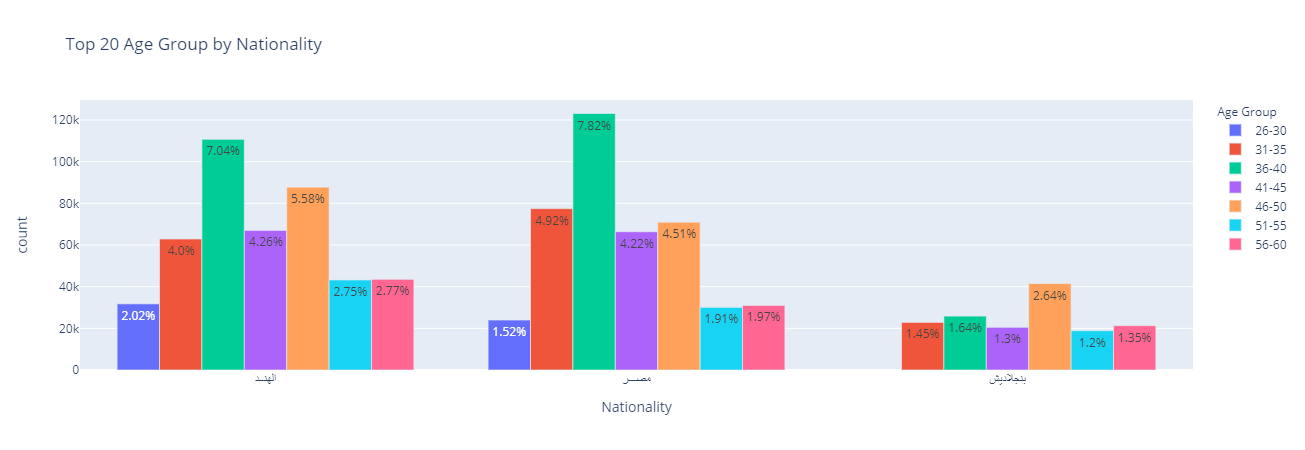

In [29]:

#hide_input

fig = px.bar(insight9,x="Nationality", y="count", color=insight9.index,barmode='group', text="Percentage", 
             title = "Top 20 Age Group by Nationality")
fig.show()

# Insight 10 : Top 20 Age Group by Educational Level

In [30]:
#hide_input

data['COUNTER'] = 1
insight10 = data.groupby(['Educational Level','Age Group'])['COUNTER'].agg(['count'])
insight10['Percentage'] = ((insight10['count'] / 1574040)*100).round(2) 
insight10['Percentage'] = insight10['Percentage'].astype(str) + '%'
insight10 = insight10.reset_index(["Educational Level"])
insight10 = insight10.nlargest(20,'count')
insight10 = insight10.sort_values("Age Group")
insight10

Educational Level   count Percentage
Age Group                                     
26-30                 متوسط   53874      3.42%
26-30                ثانوية   22710      1.44%
31-35                 متوسط  113296       7.2%
31-35                ثانوية   56517      3.59%
36-40              غير معرف   23026      1.46%
36-40                 جامعى   40167      2.55%
36-40                 متوسط  176499     11.21%
36-40                ثانوية   93749      5.96%
41-45                 متوسط  111712       7.1%
41-45                ثانوية   52959      3.36%
46-50                ثانوية   60907      3.87%
46-50                 متوسط  141317      8.98%
46-50               ابتدائي   29162      1.85%
46-50                 جامعى   24877      1.58%
51-55                ثانوية   27818      1.77%
51-55                 متوسط   67637       4.3%
56-60                 متوسط   75657      4.81%
56-60                ثانوية   30369      1.93%
61-65                 متوسط   28430      1.81%
66-70                 متوسط   22777      1.45%

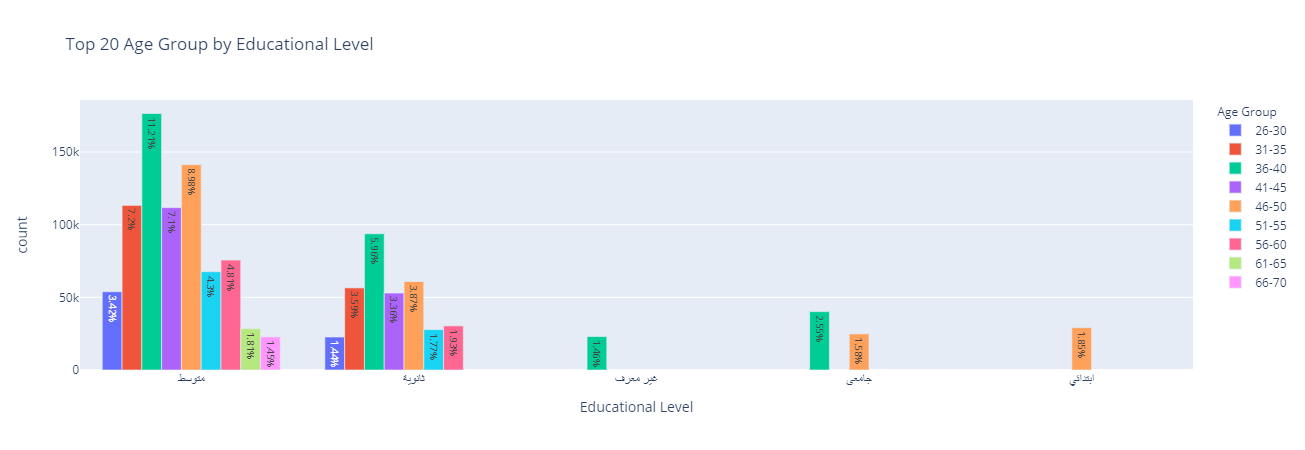

In [31]:
#hide_input

fig = px.bar(insight10,x="Educational Level", y="count", color=insight10.index,barmode='group', text = "Percentage",
             title = "Top 20 Age Group by Educational Level")
fig.show()

# Insight 11 : Top 20 Age Group by Marital Status

In [32]:
#hide_input

data['COUNTER'] = 1
insight11 = data.groupby(['Marital Status','Age Group'])['COUNTER'].agg(['count'])
insight11['Percentage'] = ((insight11['count'] / 1574040)*100).round(2) 
insight11['Percentage'] = insight11['Percentage'].astype(str) + '%'
insight11 = insight11.reset_index(["Marital Status"])
insight11 = insight11.nlargest(20,'count')
insight11 = insight11.sort_values("Age Group")
insight11

Marital Status   count Percentage
Age Group                                  
26-30              متزوج   51625      3.28%
26-30               أعزب   35328      2.24%
26-30           غير معرف    5983      0.38%
31-35              متزوج  136117      8.65%
31-35               أعزب   70392      4.47%
31-35           غير معرف    6961      0.44%
36-40              متزوج  255567     16.24%
36-40               أعزب   95805      6.09%
41-45               أعزب   46510      2.95%
41-45              متزوج  177285     11.26%
46-50               أعزب   43212      2.75%
46-50              متزوج  237963     15.12%
51-55              متزوج  118765      7.55%
51-55               أعزب   14098       0.9%
56-60               أعزب   10007      0.64%
56-60              متزوج  137112      8.71%
61-65              متزوج   53616      3.41%
66-70              متزوج   43740      2.78%
71-75              متزوج   11505      0.73%
76-80              متزوج    6668      0.42%

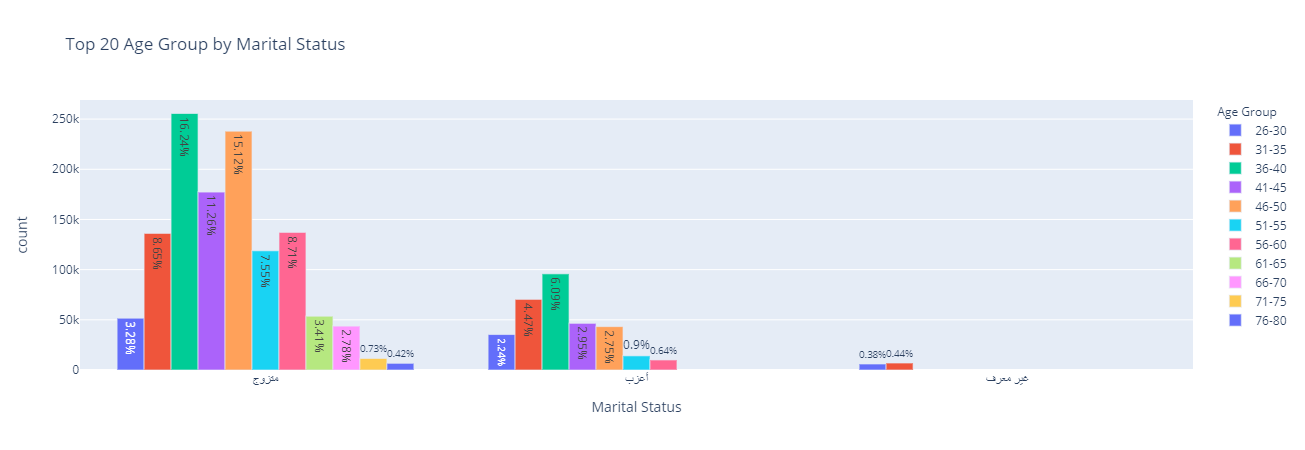

In [33]:
#hide_input

fig = px.bar(insight11,x="Marital Status", y="count", color=insight11.index,barmode='group', text = "Percentage",
             title = "Top 20 Age Group by Marital Status")
fig.show()

# Insight 12 : Top 20 Age Group by Companies

In [34]:
#hide_input

data['COUNTER'] = 1
insight12 = data.groupby(['Company','Age Group'])['COUNTER'].agg(['count'])
insight12['Percentage'] = ((insight12['count'] / 1574040)*100).round(2) 
insight12['Percentage'] = insight12['Percentage'].astype(str) + '%'
insight12 = insight12.reset_index(["Company"])
insight12 = insight12.nlargest(20,'count')
insight12 = insight12.sort_values("Age Group")
insight12

Company  count Percentage
Age Group                                                                     
31-35            مبنى الركاب الجديد بمطار الكويت (المبنى 11)   1273      0.08%
36-40            مبنى الركاب الجديد بمطار الكويت (المبنى 11)   1955      0.12%
36-40                                 شركة بدر الملا واخوانه    960      0.06%
36-40                             الشركة المتكاملة اللوجستية    972      0.06%
36-40                        (ادارة العقودالحكوميه(اعادة قيد    999      0.06%
36-40                 الشركة الكويتية للاغذية ( الامريكانا )   1020      0.06%
36-40      الهندسة والتوريد والانشاء والاعداد والتشغيل لم...   1022      0.06%
36-40         (10377)    شركة مطاحن الدقيق والمخابز الكويتية   1138      0.07%
36-40      مشروع خط انابيب التغذية لشركة نفط الكويت للمصف...   1104      0.07%
36-40      إنشاء وانجاز وصيانة مشروع معسكر الشيخ سالم الع...   1178      0.07%
36-40                     الشركة الاحمدية للمقاولات والتجارة   1194      0.08%
36-40                                  شركة محمد حمود الشايع   1820      0.12%
36-40           مركز التجمع الجديد في جنوب وشرق الكويت GC-32   1140      0.07%
41-45                                  شركة محمد حمود الشايع   1072      0.07%
41-45            مبنى الركاب الجديد بمطار الكويت (المبنى 11)   1148      0.07%
46-50                                           شركة تنظيفكو    935      0.06%
46-50                        (ادارة العقودالحكوميه(اعادة قيد   1035      0.07%
46-50            مبنى الركاب الجديد بمطار الكويت (المبنى 11)   1155      0.07%
46-50                     الشركة الاحمدية للمقاولات والتجارة    943      0.06%
46-50                                  شركة محمد حمود الشايع    901      0.06%

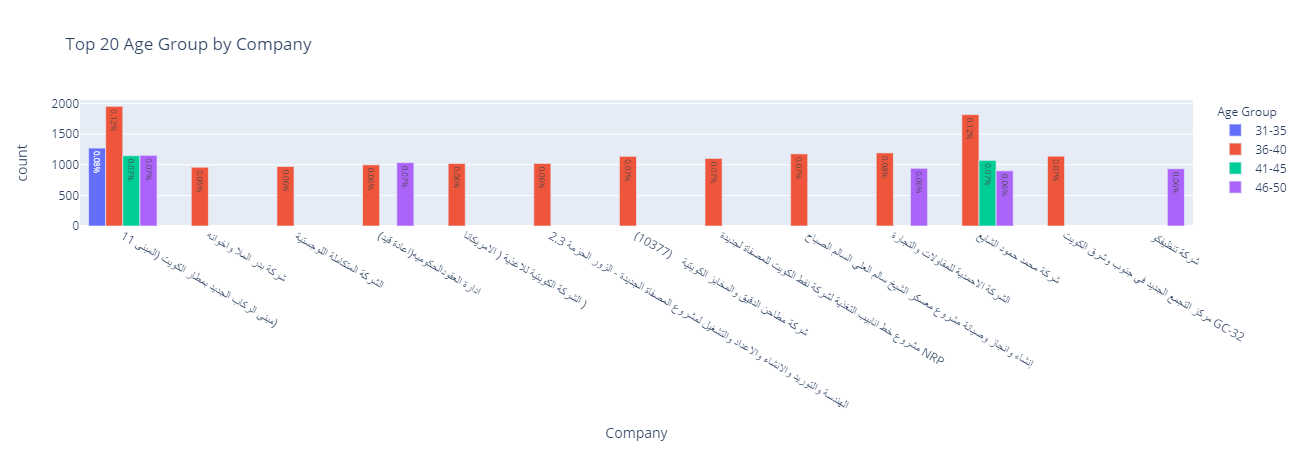

In [35]:
#hide_input

fig = px.bar(insight12,x="Company", y="count", color=insight12.index,barmode='group',text="Percentage",
             title = "Top 20 Age Group by Company")
fig.show()

# Insight 13 : Top 20 Nationalities by Educational Level

In [36]:
#hide_input

data['COUNTER'] = 1
insight13 = data.groupby(['Nationality','Educational Level'])['COUNTER'].agg(['count'])
insight13['Percentage'] = ((insight13['count'] / 1574040)*100).round(2) 
insight13['Percentage'] = insight13['Percentage'].astype(str) + '%'
insight13 = insight13.reset_index("Educational Level")
insight13 = insight13.nlargest(20,'count')


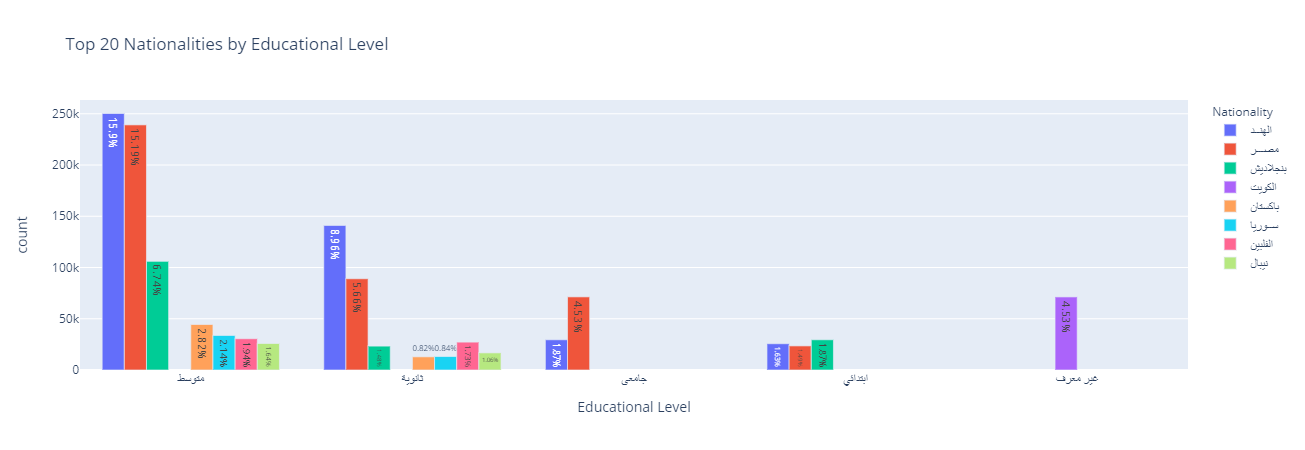

In [37]:
#hide_input

fig = px.bar(insight13,x="Educational Level", y="count", color=insight13.index,barmode='group', text="Percentage",
             title = "Top 20 Nationalities by Educational Level")
fig.show()

# Insight 14 : Top 10 Nationalities by Companies

In [38]:
#hide_input

data['COUNTER'] = 1
insight14 = data.groupby(['Nationality','Company'])['COUNTER'].agg(['count'])
insight14['Percentage'] = ((insight14['count'] / 1574040)*100).round(2) 
insight14['Percentage'] = insight14['Percentage'].astype(str) + '%'
insight14 = insight14.reset_index("Company")
insight14 = insight14.nlargest(10,'count')

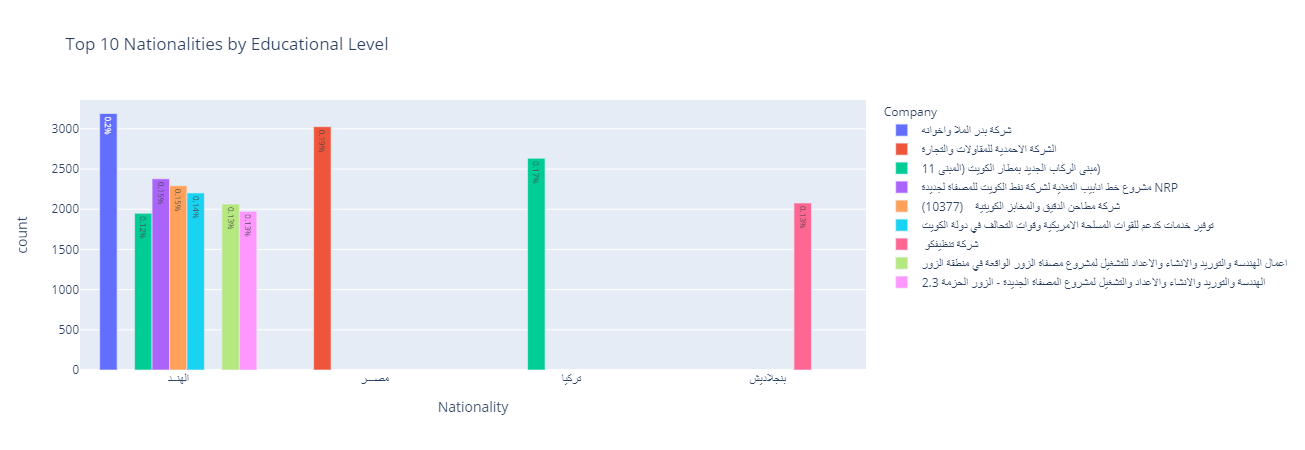

In [39]:
#hide_input

fig = px.bar(insight14,x=insight14.index, y="count", color="Company",barmode='group',text = "Percentage",
             title = "Top 10 Nationalities by Educational Level")
fig.show()

# Insight 15: Top 10 Workforce Companies

In [40]:
#hide_input

a = dict(data['Company'].value_counts())
insight15 = pd.DataFrame()
a = dict(sorted(a.items(), key=operator.itemgetter(1), reverse=True)[:10])
insight15['Company'] = a.keys()
insight15['Total Count'] = a.values()
insight15['Percentage'] = ((insight15['Total Count'] / 1574040)*100).round(2) 
insight15['Percentage'] = insight15['Percentage'].astype(str) + '%'
#insight15 = insight15.sort_values("Company")
insight15 = insight15.set_index("Company")
insight15.style.background_gradient(cmap='Reds')

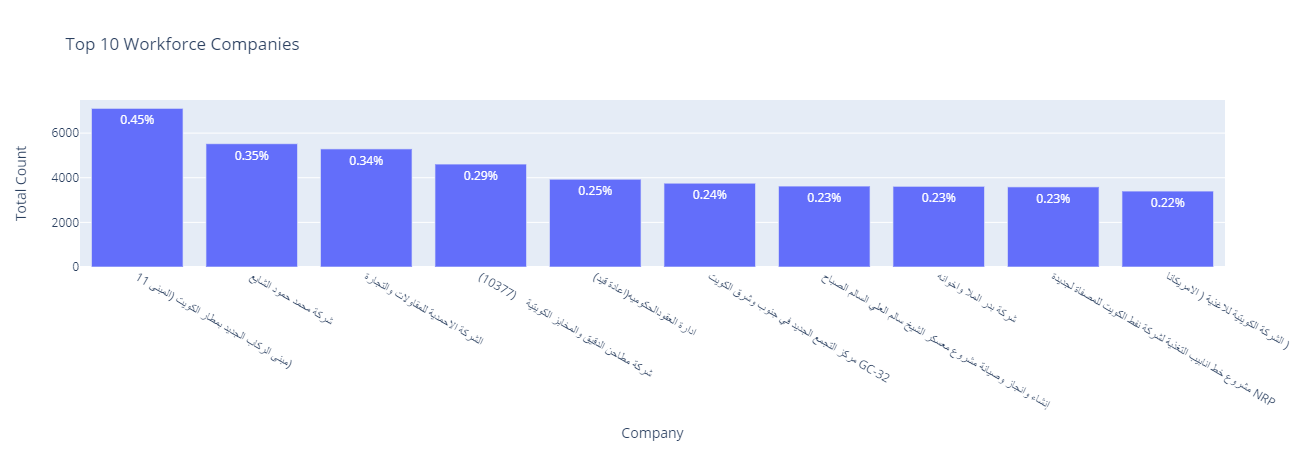

In [41]:
#hide_input

fig = px.bar(insight15, text="Percentage",x=insight15.index, y="Total Count",title = "Top 10 Workforce Companies")
fig.show()

## Insight 16 - Top 20 Age Group by Occupation and Nationality

In [42]:
#hide_input

insight16 = data.groupby(['Occupation', 'Nationality', 'Age Group']).size().unstack(level=2, fill_value=0)

In [43]:
#hide_input

insight16 = (insight16.stack().reset_index(name='Total Count').rename(columns={'level_2': 'Age Group'}))

In [44]:
#hide_input

pd.crosstab([insight16['Occupation'], insight16['Total Count']],[insight16['Age Group']],margins=True)

Age Group                                        20-25   26-30   31-35  \
Occupation                         Total Count                           
 مدرس علوم اجتماعيه ونفسيه وتربويه 0               173     173     172   
                                   1                 0       0       0   
                                   2                 0       0       1   
أخصائى                             0               173     172     172   
                                   1                 0       1       0   
...                                                ...     ...     ...   
وكيل مدرسة                         0               173     173     173   
                                   1                 0       0       0   
                                   2                 0       0       0   
                                   3                 0       0       0   
All                                             395305  395305  395305   

Age Group                                        36-40   41-45   46-50  \
Occupation                         Total Count                           
 مدرس علوم اجتماعيه ونفسيه وتربويه 0               172     172     172   
                                   1                 0       1       1   
                                   2                 1       0       0   
أخصائى                             0               171     172     172   
                                   1                 0       0       0   
...                                                ...     ...     ...   
وكيل مدرسة                         0               172     173     173   
                                   1                 1       0       0   
                                   2                 0       0       0   
                                   3                 0       0       0   
All                                             395305  395305  395305   

Age Group                                        51-55   56-60   61-65  \
Occupation                         Total Count                           
 مدرس علوم اجتماعيه ونفسيه وتربويه 0               171     173     173   
                                   1                 2       0       0   
                                   2                 0       0       0   
أخصائى                             0               172     172     173   
                                   1                 0       0       0   
...                                                ...     ...     ...   
وكيل مدرسة                         0               172     172     169   
                                   1                 1       1       3   
                                   2                 0       0       0   
                                   3                 0       0       1   
All                                             395305  395305  395305   

Age Group                                        66-70   71-75   76-80  \
Occupation                         Total Count                           
 مدرس علوم اجتماعيه ونفسيه وتربويه 0               173     173     173   
                                   1                 0       0       0   
                                   2                 0       0       0   
أخصائى                             0               172     173     173   
                                   1                 1       0       0   
...                                                ...     ...     ...   
وكيل مدرسة                         0               170     170     170   
                                   1                 2       3       2   
                                   2                 0       0       1   
                                   3                 1       0       0   
All                                             395305  395305  395305   

Age Group                                        80-85   86-90  Above 90  \
Occupation                         Total Count                          

In [45]:
#hide_input

insight16['Percentage'] = ((insight16['Total Count'] / 1574040)*100).round(2)
insight16['Percentage'] = insight16['Percentage'].astype(str) + '%'

In [46]:
#hide_input

insight16 = insight16.nlargest(20,'Total Count')

insight16.set_index("Age Group")

Occupation Nationality  Total Count Percentage
Age Group                                                      
36-40      سائق مركبه خفيفه      مصـــر        14654      0.93%
36-40        عامل عادى خفيف      مصـــر        10952       0.7%
36-40        عامل عادى خفيف     الهنــد        10370      0.66%
46-50        عامل عادى خفيف    بنجلاديش         9742      0.62%
46-50        عامل عادى خفيف     الهنــد         9604      0.61%
36-40            عامل نظافة    بنجلاديش         9322      0.59%
46-50            عامل نظافة    بنجلاديش         9310      0.59%
31-35      سائق مركبه خفيفه      مصـــر         8920      0.57%
36-40                  بائع      مصـــر         8822      0.56%
31-35            عامل نظافة    بنجلاديش         8329      0.53%
46-50        عامل عادى خفيف      مصـــر         7646      0.49%
41-45        عامل عادى خفيف     الهنــد         7088      0.45%
41-45      سائق مركبه خفيفه      مصـــر         7047      0.45%
41-45        عامل عادى خفيف      مصـــر         6649      0.42%
31-35                  بائع      مصـــر         6354       0.4%
46-50      سائق مركبه خفيفه      مصـــر         6281       0.4%
31-35        عامل عادى خفيف      مصـــر         6274       0.4%
36-40                  بائع     الهنــد         5868      0.37%
46-50      سائق مركبه خفيفه     الهنــد         5821      0.37%
31-35        عامل عادى خفيف     الهنــد         5757      0.37%

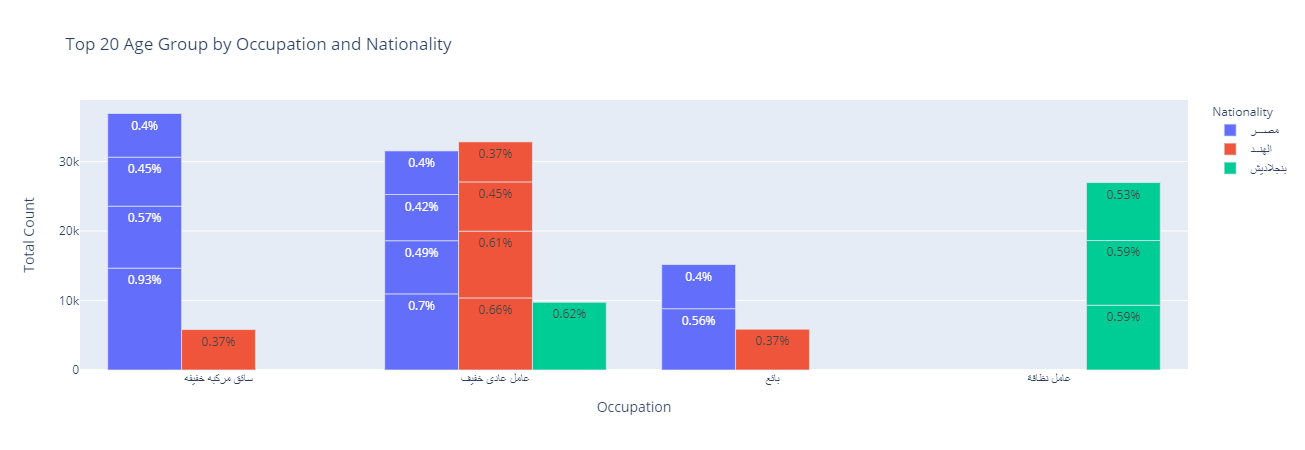

In [47]:
#hide_input

fig = px.bar(insight16,x="Occupation", y="Total Count", color='Nationality',barmode='group',text="Percentage",
            hover_data = ['Age Group','Nationality','Occupation','Total Count','Percentage'], 
            title = "Top 20 Age Group by Occupation and Nationality")

fig.show()

## Insight  17 - Top 20 Age Groups by Educational Level & Nationalities

In [48]:
#hide_input

insight17 = data.groupby(['Educational Level', 'Nationality', 'Age Group']).size().unstack(level=2, fill_value=0)

In [49]:

#hide_input

insight17 = (insight17.stack().reset_index(name='Total Count').rename(columns={'level_2': 'Age Group'}))

In [50]:
#hide_input

pd.crosstab([insight17['Educational Level'], insight17['Total Count']],[insight17['Age Group']],margins=True)

Age Group                      20-25  26-30  31-35  36-40  41-45  46-50  \
Educational Level Total Count                                             
ابتدائي           0              172    155    147    134    136    125   
                  1                1      4      6      9      5     15   
                  2                0      1      5      3      5      2   
                  3                0      3      2      3      0      3   
                  4                0      0      0      3      2      2   
...                              ...    ...    ...    ...    ...    ...   
متوسط             46188            0      0      1      0      0      0   
                  46251            0      0      0      0      0      1   
                  56038            0      0      0      1      0      0   
                  66186            0      0      0      1      0      0   
All                             2076   2076   2076   2076   2076   2076   

Age Group                      51-55  56-60  61-65  66-70  71-75  76-80  \
Educational Level Total Count                                             
ابتدائي           0              134    133    134    141    148    152   
                  1               11      9     10      7      8      4   
                  2                1      3      6      2      1      2   
                  3                3      3      1      2      2      1   
                  4                2      1      3      3      1      1   
...                              ...    ...    ...    ...    ...    ...   
متوسط             46188            0      0      0      0      0      0   
                  46251            0      0      0      0      0      0   
                  56038            0      0      0      0      0      0   
                  66186            0      0      0      0      0      0   
All                             2076   2076   2076   2076   2076   2076   

Age Group                      80-85  86-90  Above 90    All  
Educational Level Total Count                                 
ابتدائي           0              159    160       166   2196  
                  1                4      4         5    102  
                  2                2      4         1     38  
                  3                1      1         0     25  
                  4                0      1         0     19  
...                              ...    ...       ...    ...  
متوسط             46188            0      0         0      1  
                  46251            0      0         0      1  
                  56038            0      0         0      1  
                  66186            0      0         0      1  
All                             2076   2076      2076  31140  

[1212 rows x 16 columns]

In [51]:
#hide_input

pd.crosstab([insight17['Nationality'], insight17['Total Count']],[insight17['Age Group']],margins=True)

Age Group                20-25  26-30  31-35  36-40  41-45  46-50  51-55  \
Nationality Total Count                                                    
أرتيريا     0               12      8      9      6      6      6      7   
            1                0      2      0      1      1      1      1   
            2                0      0      0      1      2      2      2   
            3                0      1      0      0      0      0      0   
            4                0      0      0      1      0      0      1   
...                        ...    ...    ...    ...    ...    ...    ...   
يوغسلفيا    0               12     12     12     11     10     10     10   
            1                0      0      0      1      2      1      2   
            2                0      0      0      0      0      1      0   
            3                0      0      0      0      0      0      0   
All                       2076   2076   2076   2076   2076   2076   2076   

Age Group                56-60  61-65  66-70  71-75  76-80  80-85  86-90  \
Nationality Total Count                                                    
أرتيريا     0                7      8      7      9      8     11     12   
            1                1      1      2      2      2      1      0   
            2                1      1      0      0      1      0      0   
            3                0      0      0      1      0      0      0   
            4                0      0      1      0      0      0      0   
...                        ...    ...    ...    ...    ...    ...    ...   
يوغسلفيا    0               10     11      9     12     11     12     12   
            1                1      0      3      0      1      0      0   
            2                1      0      0      0      0      0      0   
            3                0      1      0      0      0      0      0   
All                       2076   2076   2076   2076   2076   2076   2076   

Age Group                Above 90    All  
Nationality Total Count                   
أرتيريا     0                  12    128  
            1                   0     15  
            2                   0     10  
            3                   0      2  
            4                   0      3  
...                           ...    ...  
يوغسلفيا    0                  12    166  
            1                   0     11  
            2                   0      2  
            3                   0      1  
All                          2076  31140  

[2593 rows x 16 columns]

In [52]:
#hide_input

insight17['Percentage'] = ((insight17['Total Count'] / 1574040)*100).round(2)
insight17['Percentage'] = insight17['Percentage'].astype(str) + '%'
insight17 = insight17.nlargest(20,'Total Count')
insight17.set_index("Age Group")

Educational Level Nationality  Total Count Percentage
Age Group                                                      
36-40                 متوسط      مصـــر        66186       4.2%
36-40                 متوسط     الهنــد        56038      3.56%
46-50                 متوسط     الهنــد        46251      2.94%
31-35                 متوسط      مصـــر        46188      2.93%
36-40                ثانوية     الهنــد        37597      2.39%
46-50                 متوسط      مصـــر        34996      2.22%
41-45                 متوسط     الهنــد        34352      2.18%
41-45                 متوسط      مصـــر        33320      2.12%
31-35                 متوسط     الهنــد        33089       2.1%
36-40                ثانوية      مصـــر        26107      1.66%
46-50                ثانوية     الهنــد        23978      1.52%
46-50                 متوسط    بنجلاديش        23336      1.48%
36-40                 جامعى      مصـــر        23064      1.47%
56-60                 متوسط     الهنــد        22880      1.45%
51-55                 متوسط     الهنــد        22787      1.45%
31-35                ثانوية     الهنــد        22088       1.4%
41-45                ثانوية     الهنــد        20379      1.29%
26-30                 متوسط     الهنــد        19363      1.23%
36-40              غير معرف      الكويت        18540      1.18%
36-40                 متوسط    بنجلاديش        17646      1.12%

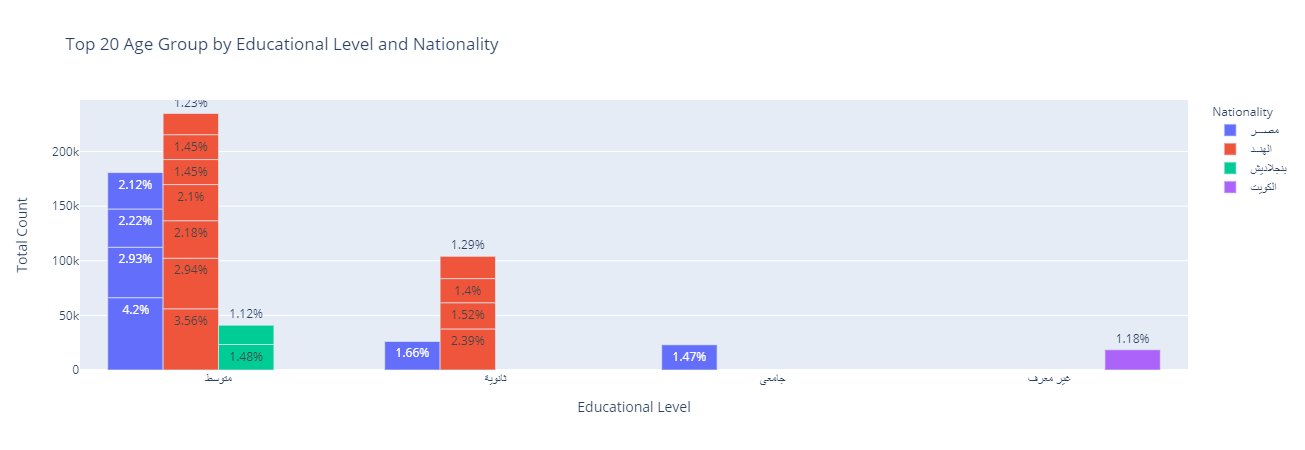

In [53]:
#hide_input

fig = px.bar(insight17,x="Educational Level", y="Total Count", color='Nationality',barmode='group',text="Percentage",
hover_data = ['Age Group','Nationality','Educational Level','Total Count','Percentage'], 
             title = "Top 20 Age Group by Educational Level and Nationality")
fig.show()

## Insight 18 - Top 20 Age Gruops by Marital Status & Nationality

In [54]:
#hide_input

insight18 = data.groupby(['Marital Status', 'Nationality', 'Age Group']).size().unstack(level=2, fill_value=0)

In [55]:
#hide_input

insight18 = (insight18.stack().reset_index(name='Total Count'))

In [56]:
#hide_input

pd.crosstab([insight18['Marital Status'], insight18['Total Count']],[insight18['Age Group']],margins=True)

Age Group                   20-25  26-30  31-35  36-40  41-45  46-50  51-55  \
Marital Status Total Count                                                    
أرمل           0              173    169    170    162    164    156    155   
               1                0      1      1      3      2      4      6   
               2                0      0      0      4      3      5      3   
               3                0      1      1      0      0      0      3   
               4                0      1      0      1      0      2      0   
...                           ...    ...    ...    ...    ...    ...    ...   
مطلق           135              0      0      0      1      0      0      0   
               191              0      0      0      1      0      0      0   
               226              0      0      0      0      1      0      0   
               301              0      0      0      0      0      1      0   
All                           865    865    865    865    865    865    865   

Age Group                   56-60  61-65  66-70  71-75  76-80  80-85  86-90  \
Marital Status Total Count                                                    
أرمل           0              156    156    157    162    162    165    165   
               1                2      6      5      3      5      5      6   
               2                4      4      0      2      2      2      2   
               3                1      0      2      1      0      0      0   
               4                1      1      1      2      3      0      0   
...                           ...    ...    ...    ...    ...    ...    ...   
مطلق           135              0      0      0      0      0      0      0   
               191              0      0      0      0      0      0      0   
               226              0      0      0      0      0      0      0   
               301              0      0      0      0      0      0      0   
All                           865    865    865    865    865    865    865   

Age Group                   Above 90    All  
Marital Status Total Count                   
أرمل           0                 173   2445  
               1                   0     49  
               2                   0     31  
               3                   0      9  
               4                   0     12  
...                              ...    ...  
مطلق           135                 0      1  
               191                 0      1  
               226                 0      1  
               301                 0      1  
All                              865  12975  

[628 rows x 16 columns]

In [57]:
#hide_input

pd.crosstab([insight18['Nationality'], insight18['Total Count']],[insight18['Age Group']],margins=True)

Age Group                20-25  26-30  31-35  36-40  41-45  46-50  51-55  \
Nationality Total Count                                                    
أرتيريا     0                5      3      3      2      3      3      3   
            1                0      0      0      1      0      0      1   
            3                0      0      0      0      0      0      0   
            4                0      0      0      0      0      0      0   
            5                0      0      0      0      0      0      0   
...                        ...    ...    ...    ...    ...    ...    ...   
يوغسلفيا    0                5      5      5      4      4      4      3   
            1                0      0      0      1      0      0      2   
            2                0      0      0      0      1      0      0   
            3                0      0      0      0      0      1      0   
All                        865    865    865    865    865    865    865   

Age Group                56-60  61-65  66-70  71-75  76-80  80-85  86-90  \
Nationality Total Count                                                    
أرتيريا     0                3      3      3      4      4      4      5   
            1                0      0      1      0      0      1      0   
            3                0      1      0      0      0      0      0   
            4                1      0      0      0      0      0      0   
            5                0      0      0      1      0      0      0   
...                        ...    ...    ...    ...    ...    ...    ...   
يوغسلفيا    0                3      4      4      5      4      5      5   
            1                1      0      0      0      1      0      0   
            2                1      0      0      0      0      0      0   
            3                0      1      1      0      0      0      0   
All                        865    865    865    865    865    865    865   

Age Group                Above 90    All  
Nationality Total Count                   
أرتيريا     0                   5     53  
            1                   0      4  
            3                   0      1  
            4                   0      1  
            5                   0      1  
...                           ...    ...  
يوغسلفيا    0                   5     65  
            1                   0      5  
            2                   0      2  
            3                   0      3  
All                           865  12975  

[1857 rows x 16 columns]

In [58]:
#hide_input

insight18['Percentage'] = ((insight18['Total Count'] / 1574040)*100).round(2)
insight18['Percentage'] = insight18['Percentage'].astype(str) + '%'
insight18 = insight18.nlargest(20,'Total Count')
insight18.set_index("Age Group")
insight18.style.background_gradient(cmap='Reds')

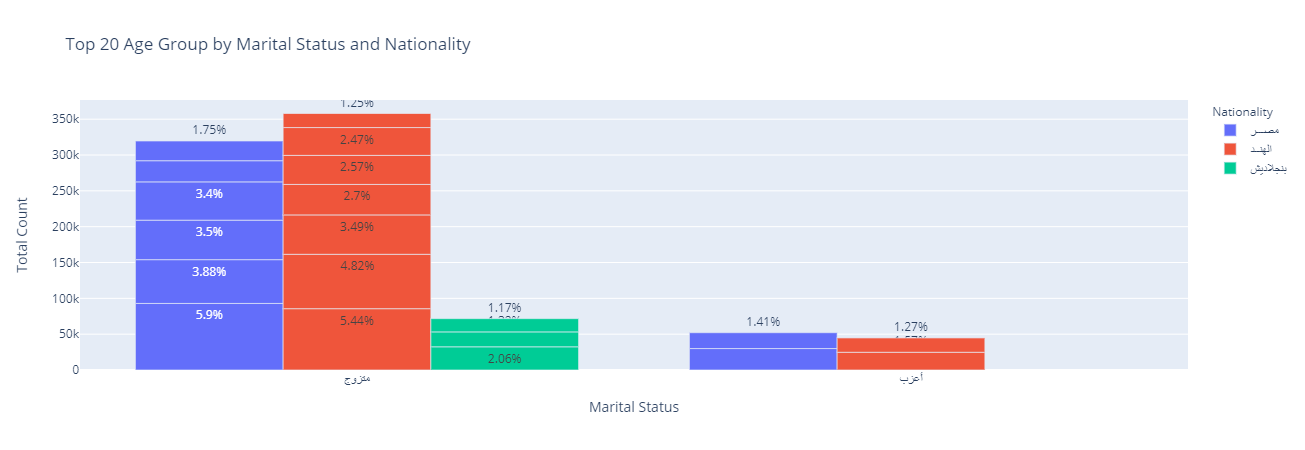

In [59]:
#hide_input

fig = px.bar(insight18,x="Marital Status", y="Total Count", color='Nationality',barmode='group', text="Percentage",
            hover_data = ['Age Group','Nationality','Marital Status','Total Count','Percentage'], 
            title = "Top 20 Age Group by Marital Status and Nationality")
fig.show()

### Insight 19 - Occupations by Nationality, Educational Level

#### Kuwaiti Vs Non-Kuwaiti

In [60]:
#hide_input

insight19 = data.groupby(['Occupation', 'Nationality', 'Educational Level','Category']).size().unstack(level=3, fill_value=0)

In [61]:
#hide_input

insight19 = (insight19.stack().reset_index(name='Total Count'))

In [62]:
#hide_input

pd.crosstab([insight19['Occupation'], insight19['Total Count']],[insight19['Educational Level']],margins=True)

Educational Level                               ابتدائي  ثانوية  جامعى  جامعي  \
Occupation                         Total Count                                  
 مدرس علوم اجتماعيه ونفسيه وتربويه 0                  0       0      2      0   
                                   1                  0       0      1      0   
                                   5                  0       0      1      0   
أخصائى                             0                  0       1      0      0   
                                   2                  0       1      0      0   
...                                                 ...     ...    ...    ...   
وكيل مدرسة                         1                  1       0      2      2   
                                   2                  0       0      0      1   
                                   3                  0       0      2      0   
                                   5                  0       0      0      1   
All                                                8442   21542  19268   4664   

Educational Level                               خبرة وبدون مؤهل  دبلوم  \
Occupation                         Total Count                           
 مدرس علوم اجتماعيه ونفسيه وتربويه 0                          0      0   
                                   1                          0      0   
                                   5                          0      0   
أخصائى                             0                          0      0   
                                   2                          0      0   
...                                                         ...    ...   
وكيل مدرسة                         1                          0      0   
                                   2                          0      0   
                                   3                          0      0   
                                   5                          0      0   
All                                                        2568   3382   

Educational Level                               دبلوم دراسات عليا سنة بعد الجامعى  \
Occupation                         Total Count                                      
 مدرس علوم اجتماعيه ونفسيه وتربويه 0                                            0   
                                   1                                            0   
                                   5                                            0   
أخصائى                             0                                            0   
                                   2                                            0   
...                                                                           ...   
وكيل مدرسة                         1                                            0   
                                   2                                            0   
                                   3                                            0   
                                   5                                            0   
All                                                                          1816   

Educational Level                               دبلوم دراسات عليا سنتان بعد الجامعى  \
Occupation                         Total Count                                        
 مدرس علوم اجتماعيه ونفسيه وتربويه 0                                              0   
                                   1                                              0   
                                   5                                              0   
أخصائى                             0                                              0   
                                   2                                              0   
...                                                                             ...   
وكيل مدرسة                         1                                              0   
                                   2                                              0   
       

In [63]:
#hide_input

pd.crosstab([insight19['Nationality'], insight19['Total Count']],[insight19['Educational Level']],margins=True)

Educational Level        ابتدائي  ثانوية  جامعى  جامعي  خبرة وبدون مؤهل  \
Nationality Total Count                                                   
أرتيريا     0                 15      46     31      5                0   
            1                 10      32     28      5                0   
            2                  4       7      2      0                0   
            3                  1       4      0      0                0   
            4                  0       2      0      0                0   
...                          ...     ...    ...    ...              ...   
هولندا      8                  0       1      0      0                0   
يوغسلفيا    0                  0       2      7      3                0   
            1                  0       2      6      2                0   
            2                  0       0      1      1                0   
All                         8442   21542  19268   4664             2568   

Educational Level        دبلوم  دبلوم دراسات عليا سنة بعد الجامعى  \
Nationality Total Count                                             
أرتيريا     0                6                                  0   
            1                6                                  0   
            2                0                                  0   
            3                0                                  0   
            4                0                                  0   
...                        ...                                ...   
هولندا      8                0                                  0   
يوغسلفيا    0                0                                  0   
            1                0                                  0   
            2                0                                  0   
All                       3382                               1816   

Educational Level        دبلوم دراسات عليا سنتان بعد الجامعى  دكتوراه  \
Nationality Total Count                                                 
أرتيريا     0                                              0        0   
            1                                              0        0   
            2                                              0        0   
            3                                              0        0   
            4                                              0        0   
...                                                      ...      ...   
هولندا      8                                              0        0   
يوغسلفيا    0                                              0        0   
            1                                              0        0   
            2                                              0        0   
All                                                      686      708   

Educational Level        غير معرف  ماجستير  متوسط    All  
Nationality Total Count                                   
أرتيريا     0                   6        0     78    187  
            1                   6        0     49    136  
            2                   0        0     14     27  
            3                   0        0      5     10  
            4                   0        0      1      3  
...                           ...      ...    ...    ...  
هولندا      8                   0        0      0      1  
يوغسلفيا    0                   0        0      4     16  
            1                   0        0      4     14  
            2                   0        0      0      2  
All                          8050     1644  23270  96040  

[3969 rows x 13 columns]

In [64]:
#hide_input

kuwait_df = insight19[insight19['Category'] == 'Kuwaiti'] 
pd.crosstab([kuwait_df['Occupation'], kuwait_df['Total Count']],[kuwait_df['Educational Level']],margins=True)

Educational Level                               ابتدائي  ثانوية  جامعى  جامعي  \
Occupation                         Total Count                                  
 مدرس علوم اجتماعيه ونفسيه وتربويه 0                  0       0      2      0   
أخصائى                             0                  0       1      0      0   
                                   72                 0       0      0      0   
أخصائى / صحة عامة                  0                  0       1      5      0   
أخصائى أحياء                       0                  0       0      4      0   
...                                                 ...     ...    ...    ...   
وكيل محامى                         0                  0       3      0      0   
                                   2                  0       0      0      0   
وكيل مدرسة                         0                  1       0      4      4   
                                   3                  0       0      0      0   
All                                                4221   10771   9634   2332   

Educational Level                               خبرة وبدون مؤهل  دبلوم  \
Occupation                         Total Count                           
 مدرس علوم اجتماعيه ونفسيه وتربويه 0                          0      0   
أخصائى                             0                          0      0   
                                   72                         0      0   
أخصائى / صحة عامة                  0                          0      0   
أخصائى أحياء                       0                          0      0   
...                                                         ...    ...   
وكيل محامى                         0                          0      0   
                                   2                          0      0   
وكيل مدرسة                         0                          0      0   
                                   3                          0      0   
All                                                        1284   1691   

Educational Level                               دبلوم دراسات عليا سنة بعد الجامعى  \
Occupation                         Total Count                                      
 مدرس علوم اجتماعيه ونفسيه وتربويه 0                                            0   
أخصائى                             0                                            0   
                                   72                                           0   
أخصائى / صحة عامة                  0                                            0   
أخصائى أحياء                       0                                            0   
...                                                                           ...   
وكيل محامى                         0                                            0   
                                   2                                            0   
وكيل مدرسة                         0                                            0   
                                   3                                            0   
All                                                                           908   

Educational Level                               دبلوم دراسات عليا سنتان بعد الجامعى  \
Occupation                         Total Count                                        
 مدرس علوم اجتماعيه ونفسيه وتربويه 0                                              0   
أخصائى                             0                                              0   
                                   72                                             0   
أخصائى / صحة عامة                  0                                              0   
أخصائى أحياء                       0                                              1   
...                                                                             ...   
وكيل محامى                         0                                              0   
                                   2                                              0   
وكيل مد

In [65]:
#hide_input

non_kuwait_df = insight19[insight19['Category'] == 'Non-Kuwaiti'] 
pd.crosstab([non_kuwait_df['Occupation'], non_kuwait_df['Total Count']],[non_kuwait_df['Educational Level']],margins=True)

Educational Level                               ابتدائي  ثانوية  جامعى  جامعي  \
Occupation                         Total Count                                  
 مدرس علوم اجتماعيه ونفسيه وتربويه 1                  0       0      1      0   
                                   5                  0       0      1      0   
أخصائى                             0                  0       0      0      0   
                                   2                  0       1      0      0   
أخصائى / صحة عامة                  1                  0       0      5      0   
...                                                 ...     ...    ...    ...   
وكيل مدرسة                         1                  1       0      2      2   
                                   2                  0       0      0      1   
                                   3                  0       0      2      0   
                                   5                  0       0      0      1   
All                                                4221   10771   9634   2332   

Educational Level                               خبرة وبدون مؤهل  دبلوم  \
Occupation                         Total Count                           
 مدرس علوم اجتماعيه ونفسيه وتربويه 1                          0      0   
                                   5                          0      0   
أخصائى                             0                          0      0   
                                   2                          0      0   
أخصائى / صحة عامة                  1                          0      0   
...                                                         ...    ...   
وكيل مدرسة                         1                          0      0   
                                   2                          0      0   
                                   3                          0      0   
                                   5                          0      0   
All                                                        1284   1691   

Educational Level                               دبلوم دراسات عليا سنة بعد الجامعى  \
Occupation                         Total Count                                      
 مدرس علوم اجتماعيه ونفسيه وتربويه 1                                            0   
                                   5                                            0   
أخصائى                             0                                            0   
                                   2                                            0   
أخصائى / صحة عامة                  1                                            0   
...                                                                           ...   
وكيل مدرسة                         1                                            0   
                                   2                                            0   
                                   3                                            0   
                                   5                                            0   
All                                                                           908   

Educational Level                               دبلوم دراسات عليا سنتان بعد الجامعى  \
Occupation                         Total Count                                        
 مدرس علوم اجتماعيه ونفسيه وتربويه 1                                              0   
                                   5                                              0   
أخصائى                             0                                              0   
                                   2                                              0   
أخصائى / صحة عامة                  1                                              0   
...                                                                             ...   
وكيل مدرسة                         1                                              0   
                                   2                                              0   
       

In [66]:
#hide_input

kuwait_df['Percentage'] = ((kuwait_df['Total Count'] / 1574040)*100).round(2)
kuwait_df['Percentage'] = kuwait_df['Percentage'].astype(str) + '%'
kuwait_df = kuwait_df.nlargest(20,'Total Count')
kuwait_df.set_index("Nationality")

Occupation Educational Level Category  Total Count  \
Nationality                                                             
الكويت               مدير عام          غير معرف  Kuwaiti         7946   
الكويت             مدير ادارى          غير معرف  Kuwaiti         3287   
الكويت                  محامى          غير معرف  Kuwaiti         2289   
الكويت                 سكرتير          غير معرف  Kuwaiti         2027   
الكويت               صراف بنك          غير معرف  Kuwaiti         1959   
الكويت                   مدير          غير معرف  Kuwaiti         1850   
الكويت                  مسئول          غير معرف  Kuwaiti         1634   
الكويت           مسئول مبيعات          غير معرف  Kuwaiti         1384   
الكويت               ضابط أمن          غير معرف  Kuwaiti         1223   
الكويت             مشرف ادارى          غير معرف  Kuwaiti         1222   
الكويت            مساعد ادارى          غير معرف  Kuwaiti         1092   
الكويت            مسئول ادارى          غير معرف  Kuwaiti         1075   
الكويت             موظف ادارى          غير معرف  Kuwaiti         1060   
الكويت            مدخل بيانات          غير معرف  Kuwaiti          997   
الكويت               غير معرف          غير معرف  Kuwaiti          944   
الكويت           موظف استقبال          غير معرف  Kuwaiti          887   
الكويت            مسئول خدمات          غير معرف  Kuwaiti          839   
الكويت                   مشرف          غير معرف  Kuwaiti          814   
الكويت       مسئول خدمة عملاء          غير معرف  Kuwaiti          782   
الكويت       موظف علاقات عامة          غير معرف  Kuwaiti          759   

            Percentage  
Nationality             
الكويت            0.5%  
الكويت           0.21%  
الكويت           0.15%  
الكويت           0.13%  
الكويت           0.12%  
الكويت           0.12%  
الكويت            0.1%  
الكويت           0.09%  
الكويت           0.08%  
الكويت           0.08%  
الكويت           0.07%  
الكويت           0.07%  
الكويت           0.07%  
الكويت           0.06%  
الكويت           0.06%  
الكويت           0.06%  
الكويت           0.05%  
الكويت           0.05%  
الكويت           0.05%  
الكويت           0.05%

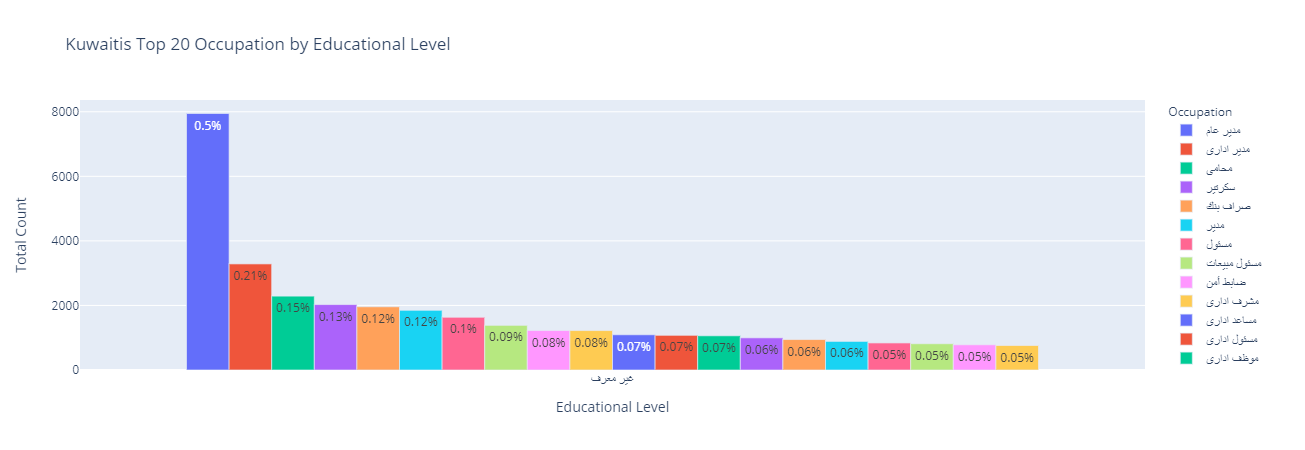

In [67]:
#hide_input

fig = px.bar(kuwait_df,x="Educational Level", y="Total Count", hover_data = kuwait_df.columns,color="Occupation",
             barmode='group',text="Percentage",title = "Kuwaitis Top 20 Occupation by Educational Level")
fig.show()

In [68]:
#hide_input

non_kuwait_df['Percentage'] = ((non_kuwait_df['Total Count'] / 1574040)*100).round(2)
non_kuwait_df['Percentage'] = non_kuwait_df['Percentage'].astype(str) + '%'
non_kuwait_df = non_kuwait_df.nlargest(20,'Total Count')
non_kuwait_df.set_index("Nationality")

Occupation Educational Level     Category  Total Count  \
Nationality                                                                 
مصـــر       سائق مركبه خفيفه             متوسط  Non-Kuwaiti        29930   
مصـــر         عامل عادى خفيف             متوسط  Non-Kuwaiti        27417   
بنجلاديش           عامل نظافة             متوسط  Non-Kuwaiti        25104   
الهنــد        عامل عادى خفيف             متوسط  Non-Kuwaiti        24320   
الهنــد                  بائع             متوسط  Non-Kuwaiti        20723   
بنجلاديش       عامل عادى خفيف             متوسط  Non-Kuwaiti        19978   
مصـــر                   بائع             متوسط  Non-Kuwaiti        19648   
الهنــد      سائق مركبه خفيفه             متوسط  Non-Kuwaiti        17440   
الهنــد        عامل عادى خفيف            ثانوية  Non-Kuwaiti        16657   
مصـــر                  محاسب             جامعى  Non-Kuwaiti        10384   
الهنــد            عامل زراعى             متوسط  Non-Kuwaiti        10341   
مصـــر       سائق مركبه خفيفه            ثانوية  Non-Kuwaiti         9244   
بنجلاديش           عامل نظافة           ابتدائي  Non-Kuwaiti         9117   
بنجلاديش       عامل عادى خفيف           ابتدائي  Non-Kuwaiti         9083   
بنجلاديش           عامل زراعى             متوسط  Non-Kuwaiti         8902   
مصـــر         عامل عادى خفيف            ثانوية  Non-Kuwaiti         8765   
الهنــد            عامل نظافة             متوسط  Non-Kuwaiti         8461   
مصـــر             سائق شاحنة             متوسط  Non-Kuwaiti         7600   
الهنــد                  بائع            ثانوية  Non-Kuwaiti         7242   
مصـــر             عامل زراعى             متوسط  Non-Kuwaiti         7219   

            Percentage  
Nationality             
مصـــر            1.9%  
مصـــر           1.74%  
بنجلاديش         1.59%  
الهنــد          1.55%  
الهنــد          1.32%  
بنجلاديش         1.27%  
مصـــر           1.25%  
الهنــد          1.11%  
الهنــد          1.06%  
مصـــر           0.66%  
الهنــد          0.66%  
مصـــر           0.59%  
بنجلاديش         0.58%  
بنجلاديش         0.58%  
بنجلاديش         0.57%  
مصـــر           0.56%  
الهنــد          0.54%  
مصـــر           0.48%  
الهنــد          0.46%  
مصـــر           0.46%

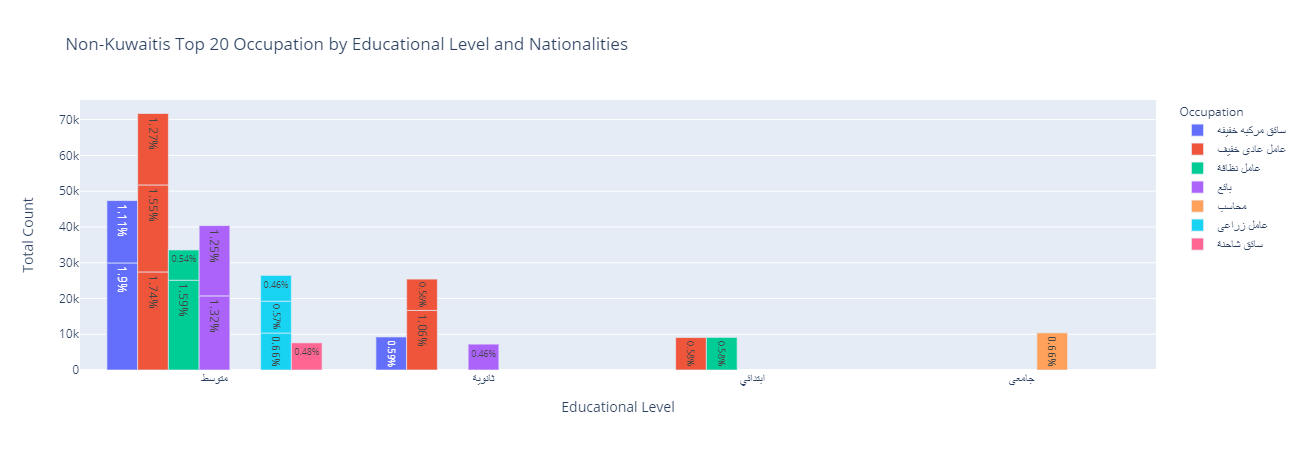

In [69]:
#hide_input

fig = px.bar(non_kuwait_df,x="Educational Level", y="Total Count", hover_data = kuwait_df.columns,color="Occupation",
            text = "Percentage",barmode='group',title = "Non-Kuwaitis Top 20 Occupation by Educational Level and Nationalities")
fig.show()

### Insight 20 - Occupations by all other Nationalities, Age Group

#### Compared to Kuwaiti having same Occupation

In [70]:
#hide_input

insight20 = data.groupby(['Occupation', 'Category','Age Group']).size().unstack(level=2, fill_value=0)

In [71]:
#hide_input

insight20  = (insight20.stack().reset_index(name='Total Count'))

In [72]:
#hide_input

pd.crosstab([insight20['Occupation'], insight20['Total Count']],[insight20['Age Group']],margins=True)

Age Group                                       20-25  26-30  31-35  36-40  \
Occupation                         Total Count                               
 مدرس علوم اجتماعيه ونفسيه وتربويه 0                2      2      1      1   
                                   1                0      0      0      0   
                                   2                0      0      1      1   
أخصائى                             0                2      1      1      0   
                                   1                0      1      0      0   
...                                               ...    ...    ...    ...   
وكيل مدرسة                         1                0      0      0      1   
                                   3                0      0      0      0   
                                   4                0      0      0      0   
                                   5                0      0      0      0   
All                                              4570   4570   4570   4570   

Age Group                                       41-45  46-50  51-55  56-60  \
Occupation                         Total Count                               
 مدرس علوم اجتماعيه ونفسيه وتربويه 0                1      1      1      2   
                                   1                1      1      0      0   
                                   2                0      0      1      0   
أخصائى                             0                1      1      1      1   
                                   1                0      0      0      0   
...                                               ...    ...    ...    ...   
وكيل مدرسة                         1                0      0      1      1   
                                   3                0      0      0      0   
                                   4                0      0      0      0   
                                   5                0      0      0      0   
All                                              4570   4570   4570   4570   

Age Group                                       61-65  66-70  71-75  76-80  \
Occupation                         Total Count                               
 مدرس علوم اجتماعيه ونفسيه وتربويه 0                2      2      2      2   
                                   1                0      0      0      0   
                                   2                0      0      0      0   
أخصائى                             0                2      1      2      2   
                                   1                0      1      0      0   
...                                               ...    ...    ...    ...   
وكيل مدرسة                         1                1      1      0      0   
                                   3                0      0      1      0   
                                   4                0      1      0      1   
                                   5                1      0      0      0   
All                                              4570   4570   4570   4570   

Age Group                                       80-85  86-90  Above 90    All  
Occupation                         Total Count                                 
 مدرس علوم اجتماعيه ونفسيه وتربويه 0                2      2         2     25  
                                   1                0      0         0      2  
                                   2                0      0         0      3  
أخصائى                             0                2      2         2     21  
                                   1                0      0         0      2  
...                                               ...    ...       ...    ...  
وكيل مدرسة                         1                0      0         0      5  
                                   3                0      0         0      1  
                                   4                0      0         0      2  
                                   5                0      0         0     

In [73]:
#hide_input

kuwait_df = insight20[insight20['Category'] == 'Kuwaiti'] 
#pd.crosstab([kuwait_df['Occupation'], kuwait_df['Total Count']],[kuwait_df['Age Group']],margins=True)

In [74]:
#hide_input

non_kuwait_df = insight20[insight20['Category'] == 'Non-Kuwaiti'] 
#pd.crosstab([non_kuwait_df['Occupation'], non_kuwait_df['Total Count']],[non_kuwait_df['Age Group']],margins=True)

In [75]:
#hide_input

kuwait_df['Percentage'] = ((kuwait_df['Total Count'] / 1574040)*100).round(2)
kuwait_df['Percentage'] = kuwait_df['Percentage'].astype(str) + '%'
kuwait = kuwait_df.nlargest(20,'Total Count')
kuwait.set_index("Age Group")

Occupation Category  Total Count Percentage
Age Group                                             
36-40        مدير عام  Kuwaiti         1990      0.13%
46-50        مدير عام  Kuwaiti         1478      0.09%
41-45        مدير عام  Kuwaiti         1301      0.08%
31-35        صراف بنك  Kuwaiti          835      0.05%
36-40           محامى  Kuwaiti          832      0.05%
51-55        مدير عام  Kuwaiti          827      0.05%
31-35        مدير عام  Kuwaiti          823      0.05%
56-60        مدير عام  Kuwaiti          815      0.05%
36-40      مدير ادارى  Kuwaiti          684      0.04%
46-50      مدير ادارى  Kuwaiti          680      0.04%
36-40        صراف بنك  Kuwaiti          554      0.04%
36-40           مسئول  Kuwaiti          498      0.03%
26-30        صراف بنك  Kuwaiti          472      0.03%
41-45      مدير ادارى  Kuwaiti          467      0.03%
56-60      مدير ادارى  Kuwaiti          441      0.03%
46-50          سكرتير  Kuwaiti          415      0.03%
31-35           محامى  Kuwaiti          398      0.03%
51-55      مدير ادارى  Kuwaiti          393      0.02%
56-60            مدير  Kuwaiti          388      0.02%
36-40          سكرتير  Kuwaiti          384      0.02%

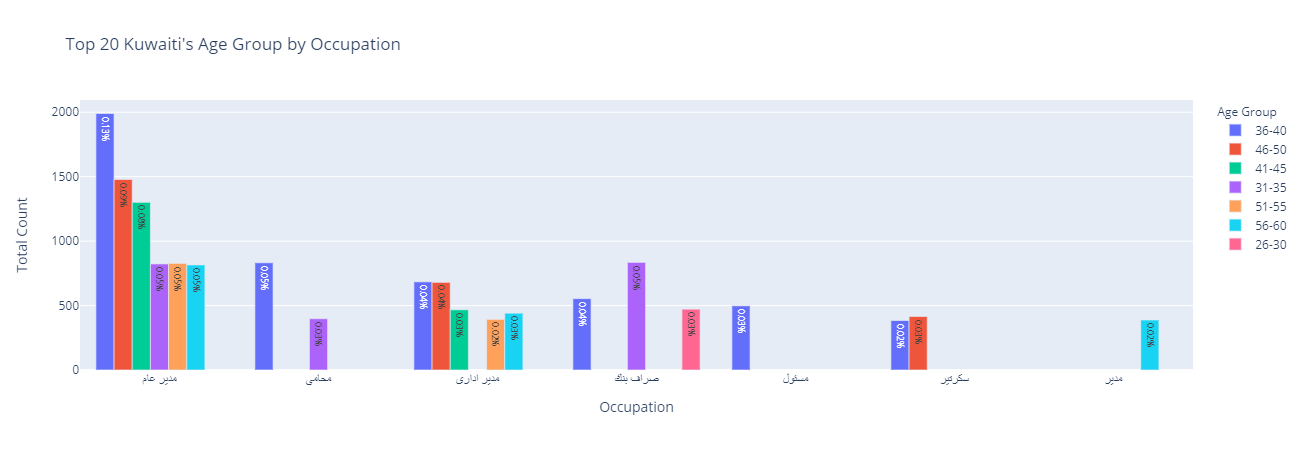

In [76]:
#hide_input

fig = px.bar(kuwait,x="Occupation", y="Total Count", hover_data = kuwait.columns, text="Percentage",color ="Age Group",
             barmode='group',title = "Top 20 Kuwaiti's Age Group by Occupation")
fig.show()

In [77]:
#hide_input

non_kuwait_df['Percentage'] = ((non_kuwait_df['Total Count'] / 1574040)*100).round(2)
non_kuwait_df['Percentage'] = non_kuwait_df['Percentage'].astype(str) + '%'
non_kuwait = non_kuwait_df.nlargest(20,'Total Count')
non_kuwait.set_index("Age Group")

Occupation     Category  Total Count Percentage
Age Group                                                       
46-50        عامل عادى خفيف  Non-Kuwaiti        33101       2.1%
36-40        عامل عادى خفيف  Non-Kuwaiti        32484      2.06%
36-40      سائق مركبه خفيفه  Non-Kuwaiti        25512      1.62%
41-45        عامل عادى خفيف  Non-Kuwaiti        23485      1.49%
36-40                  بائع  Non-Kuwaiti        20851      1.32%
31-35        عامل عادى خفيف  Non-Kuwaiti        19249      1.22%
46-50      سائق مركبه خفيفه  Non-Kuwaiti        18956       1.2%
56-60        عامل عادى خفيف  Non-Kuwaiti        18735      1.19%
46-50                  بائع  Non-Kuwaiti        17109      1.09%
51-55        عامل عادى خفيف  Non-Kuwaiti        16319      1.04%
41-45      سائق مركبه خفيفه  Non-Kuwaiti        16278      1.03%
31-35      سائق مركبه خفيفه  Non-Kuwaiti        15597      0.99%
36-40            عامل نظافة  Non-Kuwaiti        14853      0.94%
41-45                  بائع  Non-Kuwaiti        13790      0.88%
31-35                  بائع  Non-Kuwaiti        13727      0.87%
46-50            عامل نظافة  Non-Kuwaiti        13458      0.85%
31-35            عامل نظافة  Non-Kuwaiti        11223      0.71%
36-40            عامل زراعى  Non-Kuwaiti        10384      0.66%
56-60                  بائع  Non-Kuwaiti         9600      0.61%
56-60      سائق مركبه خفيفه  Non-Kuwaiti         9014      0.57%

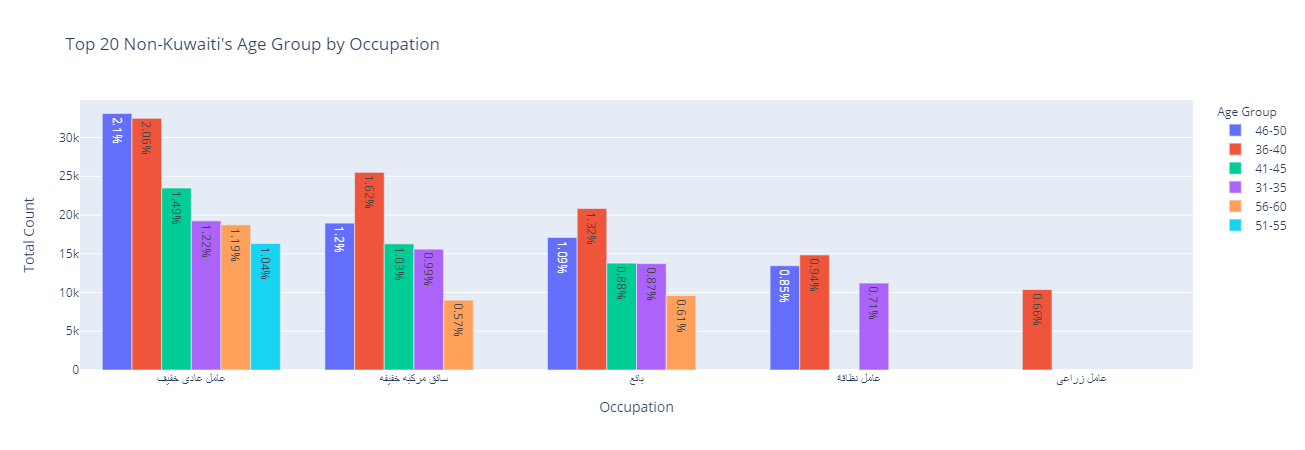

In [78]:
#hide_input

fig = px.bar(non_kuwait, x="Occupation", y="Total Count", hover_data = non_kuwait_df.columns,color ="Age Group", 
             text="Percentage", barmode='group',title = "Top 20 Non-Kuwaiti's Age Group by Occupation")
fig.show()

**Checking for Non-Kuwaitis Occupation that are same as Kuwaitis**

In [79]:
#hide_input

rslt = non_kuwait_df[non_kuwait_df['Occupation'].isin(kuwait_df['Occupation'])]
rslt1 = rslt.nlargest(20,'Total Count')
rslt1.set_index('Age Group')

Occupation     Category  Total Count Percentage
Age Group                                                       
46-50        عامل عادى خفيف  Non-Kuwaiti        33101       2.1%
36-40        عامل عادى خفيف  Non-Kuwaiti        32484      2.06%
36-40      سائق مركبه خفيفه  Non-Kuwaiti        25512      1.62%
41-45        عامل عادى خفيف  Non-Kuwaiti        23485      1.49%
36-40                  بائع  Non-Kuwaiti        20851      1.32%
31-35        عامل عادى خفيف  Non-Kuwaiti        19249      1.22%
46-50      سائق مركبه خفيفه  Non-Kuwaiti        18956       1.2%
56-60        عامل عادى خفيف  Non-Kuwaiti        18735      1.19%
46-50                  بائع  Non-Kuwaiti        17109      1.09%
51-55        عامل عادى خفيف  Non-Kuwaiti        16319      1.04%
41-45      سائق مركبه خفيفه  Non-Kuwaiti        16278      1.03%
31-35      سائق مركبه خفيفه  Non-Kuwaiti        15597      0.99%
36-40            عامل نظافة  Non-Kuwaiti        14853      0.94%
41-45                  بائع  Non-Kuwaiti        13790      0.88%
31-35                  بائع  Non-Kuwaiti        13727      0.87%
46-50            عامل نظافة  Non-Kuwaiti        13458      0.85%
31-35            عامل نظافة  Non-Kuwaiti        11223      0.71%
36-40            عامل زراعى  Non-Kuwaiti        10384      0.66%
56-60                  بائع  Non-Kuwaiti         9600      0.61%
56-60      سائق مركبه خفيفه  Non-Kuwaiti         9014      0.57%

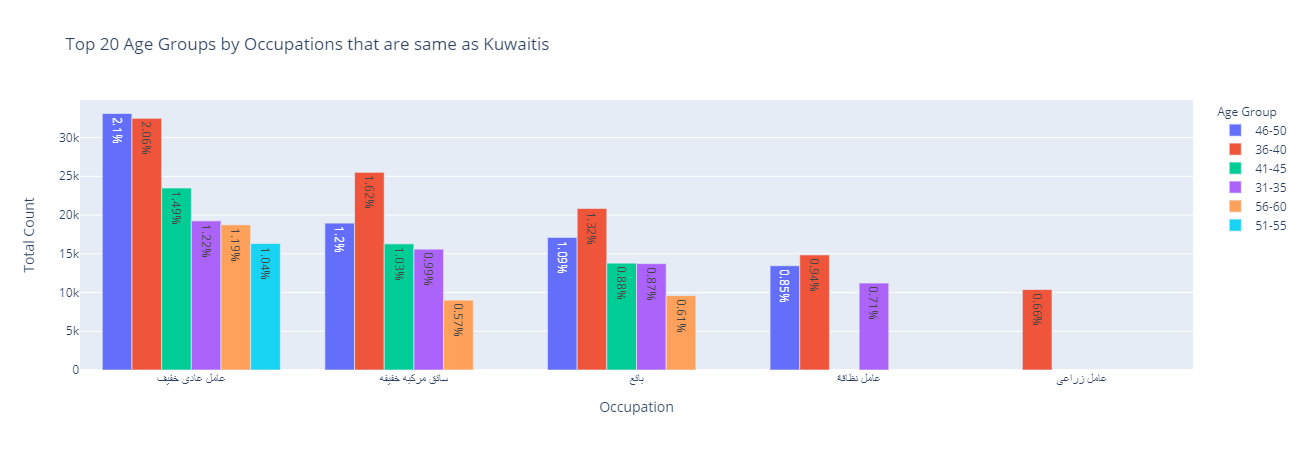

In [80]:
#hide_input

fig = px.bar(rslt1, x="Occupation", y="Total Count",barmode='group',
             title ="Top 20 Age Groups by Occupations that are same as Kuwaitis",color = "Age Group",text = "Percentage")
fig.show()

In [81]:
#hide_input

a = rslt['Occupation'].unique()
print("\n Number of Unique No-Kuwaitis Occupation that are same as Kuwaitis:  ",len(a))
print("\n\n\n 1000 Non - Kuwaitis Occupations that are same as Kuwaitis\n\n")
a[0:1000]


 Number of Unique No-Kuwaitis Occupation that are same as Kuwaitis:   2285



 1000 Non - Kuwaitis Occupations that are same as Kuwaitis




array([' مدرس علوم اجتماعيه ونفسيه وتربويه', 'أخصائى',
       'أخصائى / صحة عامة', 'أخصائى أحياء', 'أخصائى أسنان',
       'أخصائى ألبان', 'أخصائى اجتماعى', 'أخصائى ادارى', 'أخصائى اقتصادى',
       'أخصائى بكتريا / صيدله', 'أخصائى تجميل', 'أخصائى تحليل وظائف',
       'أخصائى تربة', 'أخصائى تغذية', 'أخصائى تغذية / عام',
       'أخصائى تقنيات تربوية', 'أخصائى توجيه مهنى', 'أخصائى جغرافيا',
       'أخصائى حيوان', 'أخصائى دعاية', 'أخصائى زراعة',
       'أخصائى شئون أفراد', 'أخصائى شئون ادارية', 'أخصائى شئون موظفين',
       'أخصائى علاج طبيعى', 'أخصائى علاج مهنى', 'أخصائى فنى / علمى',
       'أخصائى قياس بصر', 'أخصائى كيمياء حيوية', 'أخصائى لغات',
       'أخصائى مالى', 'أخصائى نبات', 'أخصائى نطق',
       'أخصائى نظارات و عدسات', 'أخصائى نفسى', 'أخصائى وظائف أعضاء',
       'أخصائى وقاية حريق', 'أخصائي علاج بالعمل', 'أمين خزينة',
       'أمين صندوق', 'أمين محفوظات', 'أمين مخزن', 'أمين مستودع',
       'أمين معرض', 'أمين مكتبة', 'احصائى', 'اختصاصى باطنية',
       'اختصاصى تقويم اسنان', 'اختصاصى 

### INSIGHT 21 - OCCUPATIONS BY ALL OTHER NATIONALITIES, EDUCATION LEVEL

#### COMPARED TO KUWAITI NOT HAVING SAME OCCUPATION

In [82]:
#hide_input

data['COUNTER'] = 1
insight21 = data.groupby(["Category","Occupation","Nationality","Educational Level"])['COUNTER'].agg(['count'])
insight21['Percentage'] = ((insight21['count'] / 1574040)*100).round(2) 
insight21['Percentage'] = insight21['Percentage'].astype(str) + '%'
insight21 = insight21.reset_index(["Category","Occupation","Nationality","Educational Level"])

In [83]:
#hide_input

kuwait_df = insight21[insight21['Category'] == "Kuwaiti"]

In [84]:
#hide_input

non_kuwait_df = insight21[insight21['Category'] == "Non-Kuwaiti"]

In [85]:
#hide_input

rslt = non_kuwait_df[~ non_kuwait_df['Occupation'].isin(kuwait_df['Occupation'])]

In [86]:
#hide_input

pd.crosstab([rslt['Occupation'], rslt['count']],[rslt['Educational Level']],margins=True)

Educational Level                         ابتدائي  ثانوية  جامعى  جامعي  \
Occupation                         count                                  
 مدرس علوم اجتماعيه ونفسيه وتربويه 1            0       0      1      0   
                                   5            0       0      1      0   
أخصائى / صحة عامة                  1            0       0      5      0   
                                   2            0       1      0      0   
أخصائى ألبان                       1            0       1      0      1   
...                                           ...     ...    ...    ...   
واعظ دينى                          3            0       0      1      0   
                                   4            0       0      1      0   
                                   5            0       0      1      0   
                                   7            0       0      1      0   
All                                          1365    2647   1615    242   

Educational Level                         خبرة وبدون مؤهل  دبلوم  \
Occupation                         count                           
 مدرس علوم اجتماعيه ونفسيه وتربويه 1                    0      0   
                                   5                    0      0   
أخصائى / صحة عامة                  1                    0      0   
                                   2                    0      0   
أخصائى ألبان                       1                    0      0   
...                                                   ...    ...   
واعظ دينى                          3                    0      0   
                                   4                    0      0   
                                   5                    0      0   
                                   7                    0      0   
All                                                   447    377   

Educational Level                         دبلوم دراسات عليا سنة بعد الجامعى  \
Occupation                         count                                      
 مدرس علوم اجتماعيه ونفسيه وتربويه 1                                      0   
                                   5                                      0   
أخصائى / صحة عامة                  1                                      0   
                                   2                                      0   
أخصائى ألبان                       1                                      0   
...                                                                     ...   
واعظ دينى                          3                                      0   
                                   4                                      0   
                                   5                                      0   
                                   7                                      0   
All                                                                     181   

Educational Level                         دبلوم دراسات عليا سنتان بعد الجامعى  \
Occupation                         count                                        
 مدرس علوم اجتماعيه ونفسيه وتربويه 1                                        0   
                                   5                                        0   
أخصائى / صحة عامة                  1                                        0   
                                   2                                        0   
أخصائى ألبان                       1                                        0   
...                                                                       ...   
واعظ دينى                          3                                        0   
                                   4                                        0   
                                   5                                        0   
                                   7                                        0   
All                                                                        38   

Educational Level                         دكتوراه  غير مع

In [87]:
#hide_input

rslt = non_kuwait_df[~non_kuwait_df['Occupation'].isin(kuwait_df['Occupation'])]
rslt1= rslt.nlargest(20,'count')
rslt1.set_index("Nationality")

Category  Occupation Educational Level  count Percentage
Nationality                                                             
بنجلاديش     Non-Kuwaiti  عامل نظافة             متوسط  25104      1.59%
الهنــد      Non-Kuwaiti  عامل زراعى             متوسط  10341      0.66%
بنجلاديش     Non-Kuwaiti  عامل نظافة           ابتدائي   9117      0.58%
بنجلاديش     Non-Kuwaiti  عامل زراعى             متوسط   8902      0.57%
الهنــد      Non-Kuwaiti  عامل نظافة             متوسط   8461      0.54%
مصـــر       Non-Kuwaiti  عامل زراعى             متوسط   7219      0.46%
مصـــر       Non-Kuwaiti        نجار             متوسط   4634      0.29%
بنجلاديش     Non-Kuwaiti  عامل نظافة            ثانوية   4440      0.28%
الهنــد      Non-Kuwaiti   عامل مطعم             متوسط   4094      0.26%
بنجلاديش     Non-Kuwaiti   سائق اجرة             متوسط   4003      0.25%
نيبال        Non-Kuwaiti  عامل نظافة             متوسط   3979      0.25%
الهنــد      Non-Kuwaiti  راعي أغنام             متوسط   3774      0.24%
مصـــر       Non-Kuwaiti        حداد             متوسط   3368      0.21%
مصـــر       Non-Kuwaiti   عامل مطعم             متوسط   3355      0.21%
الهنــد      Non-Kuwaiti  عامل زراعى            ثانوية   3201       0.2%
الهنــد      Non-Kuwaiti        حداد             متوسط   3124       0.2%
بنجلاديش     Non-Kuwaiti  راعي أغنام             متوسط   3017      0.19%
مصـــر       Non-Kuwaiti      جارسون             متوسط   2935      0.19%
مصـــر       Non-Kuwaiti        صباغ             متوسط   2842      0.18%
الهنــد      Non-Kuwaiti      جارسون             متوسط   2730      0.17%

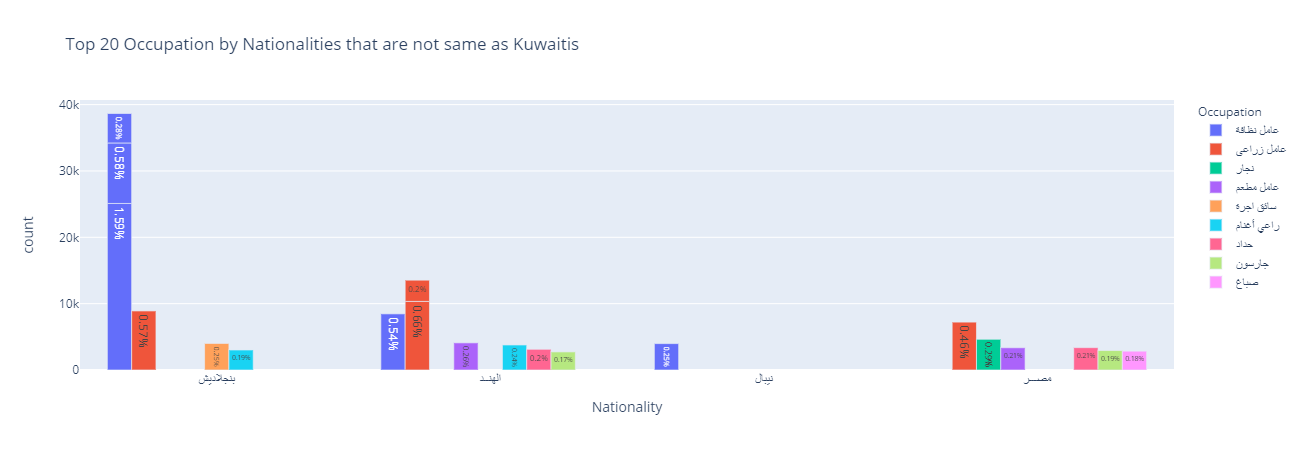

In [88]:
#hide_input

fig = px.bar(rslt1,x="Nationality", y="count", hover_data = kuwait_df.columns,color="Occupation",text="Percentage",
            barmode='group',title = "Top 20 Occupation by Nationalities that are not same as Kuwaitis")
fig.show()

In [89]:
#hide_input

a = rslt['Occupation'].unique()
print("\n Number of Unique No-Kuwaitis Occupation that are not same as Kuwaitis:  ",len(a))

print("\n\n\n 1000 Non - Kuwaitis Occupations that are not same as Kuwaitis\n\n")
a[0:1000]


 Number of Unique No-Kuwaitis Occupation that are not same as Kuwaitis:   1065



 1000 Non - Kuwaitis Occupations that are not same as Kuwaitis




array([' مدرس علوم اجتماعيه ونفسيه وتربويه', 'أخصائى / صحة عامة',
       'أخصائى ألبان', 'أخصائى تحليل وظائف', 'أخصائى تربة',
       'أخصائى تغذية / عام', 'أخصائى توجيه مهنى', 'أخصائى جغرافيا',
       'أخصائى زراعة', 'أخصائى شئون موظفين', 'أخصائى علاج مهنى',
       'أخصائى قياس بصر', 'أخصائى كيمياء حيوية', 'أخصائى لغات',
       'أخصائى نبات', 'أخصائى نظارات و عدسات', 'أخصائى وظائف أعضاء',
       'أخصائي علاج بالعمل', 'أمين مستودع', 'أمين معرض', 'اختصاصى باطنية',
       'اختصاصى تقويم اسنان', 'اختصاصى جراحة تجميل', 'اختصاصى مختبر',
       'اختصاصى مسالك بولية', 'اختصاصي تخدير', 'اخصائى اتظمة الجودة',
       'اخصائى اشعة', 'اخصائى الخدمات الفنية', 'اخصائى انتاج',
       'اخصائى انتاج يومى ثلاثة', 'اخصائى انظمة الصحة والسلامة والبيئة',
       'اخصائى اول الخبرة والتطوير',
       'اخصائى اول انظمة الصحة والسلامة والبيئة',
       'اخصائى تدقيق فواتير المشتريات', 'اخصائى تسجيل',
       'اخصائى تطوير المنتجات', 'اخصائى جراحة عامة',
       'اخصائى حاسب الى اول', 'اخصائى خطوط ربط', 'اخصائى دعم 

### Insight 22 - Occupations by all other Nationalities,Marital Status

#### Kuwaiti Vs Non-Kuwaiti

In [90]:
#hide_input

insight22 = data.groupby(['Occupation', 'Marital Status','Category']).size().unstack(level=2, fill_value=0)

In [91]:
#hide_input

insight22 = (insight22.stack().reset_index(name='Total Count'))

In [92]:
#hide_input

kuwait_df = insight22[insight22['Category'] == 'Kuwaiti'] 


In [93]:
#hide_input

non_kuwait_df = insight22[insight22['Category'] == 'Non-Kuwaiti'] 


In [94]:
#hide_input

kuwait_df['Percentage'] = ((kuwait_df['Total Count'] / 1574040)*100).round(2)
kuwait_df['Percentage'] = kuwait_df['Percentage'].astype(str) + '%'
kuwait_df = kuwait_df.nlargest(10,'Total Count')
kuwait_df.set_index("Occupation")

Marital Status Category  Total Count Percentage
Occupation                                                
مدير عام            متزوج  Kuwaiti         5021      0.32%
مدير ادارى          متزوج  Kuwaiti         2338      0.15%
مدير عام             أعزب  Kuwaiti         1790      0.11%
مدير                متزوج  Kuwaiti         1433      0.09%
سكرتير              متزوج  Kuwaiti         1336      0.08%
صراف بنك         غير معرف  Kuwaiti         1262      0.08%
محامى               متزوج  Kuwaiti         1246      0.08%
مدير عام         غير معرف  Kuwaiti          886      0.06%
ضابط أمن            متزوج  Kuwaiti          864      0.05%
مسئول               متزوج  Kuwaiti          793      0.05%

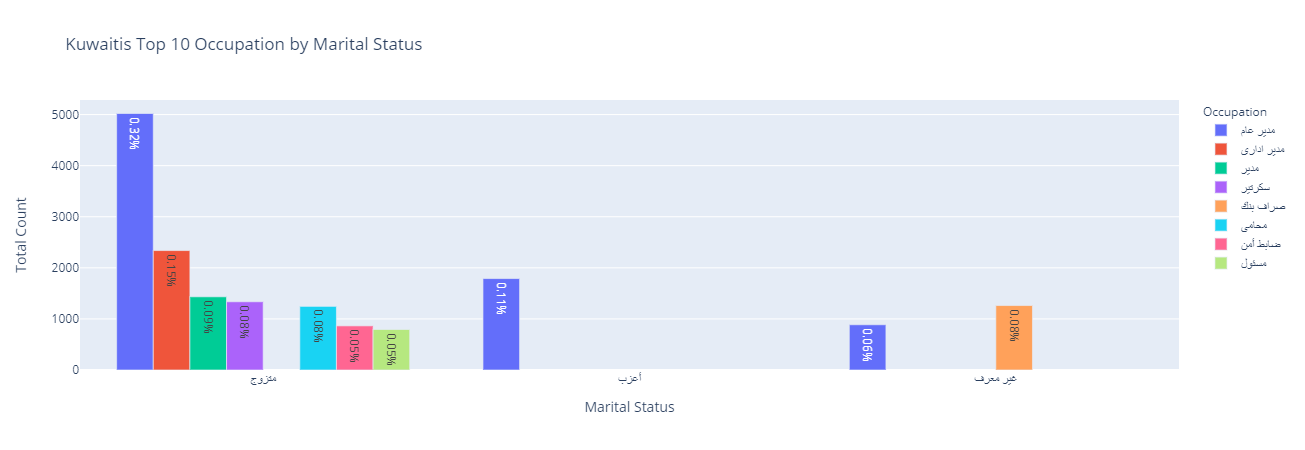

In [95]:
#hide_input

fig = px.bar(kuwait_df,x="Marital Status", y="Total Count", hover_data = kuwait_df.columns,color="Occupation",barmode='group',
             title = "Kuwaitis Top 10 Occupation by Marital Status",text="Percentage")
fig.show()

In [96]:
#hide_input

non_kuwait_df['Percentage'] = ((non_kuwait_df['Total Count'] / 1574040)*100).round(2)
non_kuwait_df['Percentage'] = non_kuwait_df['Percentage'].astype(str) + '%'
non_kuwait_df = non_kuwait_df.nlargest(10,'Total Count')
non_kuwait_df.set_index("Occupation")

Marital Status     Category  Total Count Percentage
Occupation                                                          
عامل عادى خفيف            متزوج  Non-Kuwaiti       136556      8.68%
سائق مركبه خفيفه          متزوج  Non-Kuwaiti        86037      5.47%
بائع                      متزوج  Non-Kuwaiti        79157      5.03%
عامل نظافة                متزوج  Non-Kuwaiti        45155      2.87%
عامل زراعى                متزوج  Non-Kuwaiti        35539      2.26%
عامل عادى خفيف             أعزب  Non-Kuwaiti        27504      1.75%
عامل انتاج                متزوج  Non-Kuwaiti        24816      1.58%
سائق معدات ثقيلة          متزوج  Non-Kuwaiti        23410      1.49%
عامل فنى                  متزوج  Non-Kuwaiti        21026      1.34%
سائق مركبه خفيفه           أعزب  Non-Kuwaiti        20798      1.32%

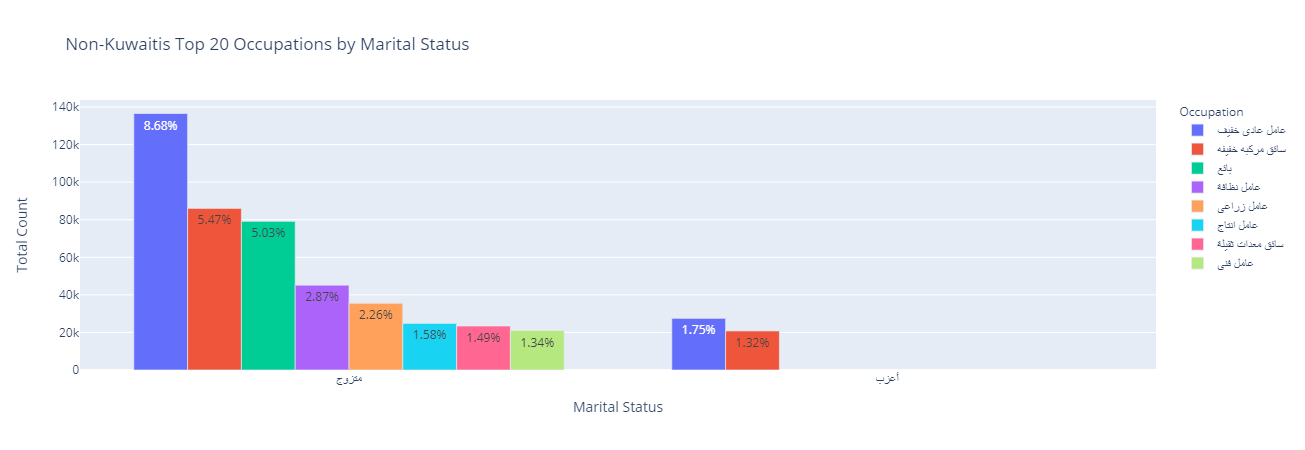

In [97]:
#hide_input

fig = px.bar(non_kuwait_df,x="Marital Status", y="Total Count", hover_data = non_kuwait_df.columns,color="Occupation",barmode='group',
             title = "Non-Kuwaitis Top 20 Occupations by Marital Status",text="Percentage")
fig.show()

### Insight 23 :  Total work force by Different Parameters

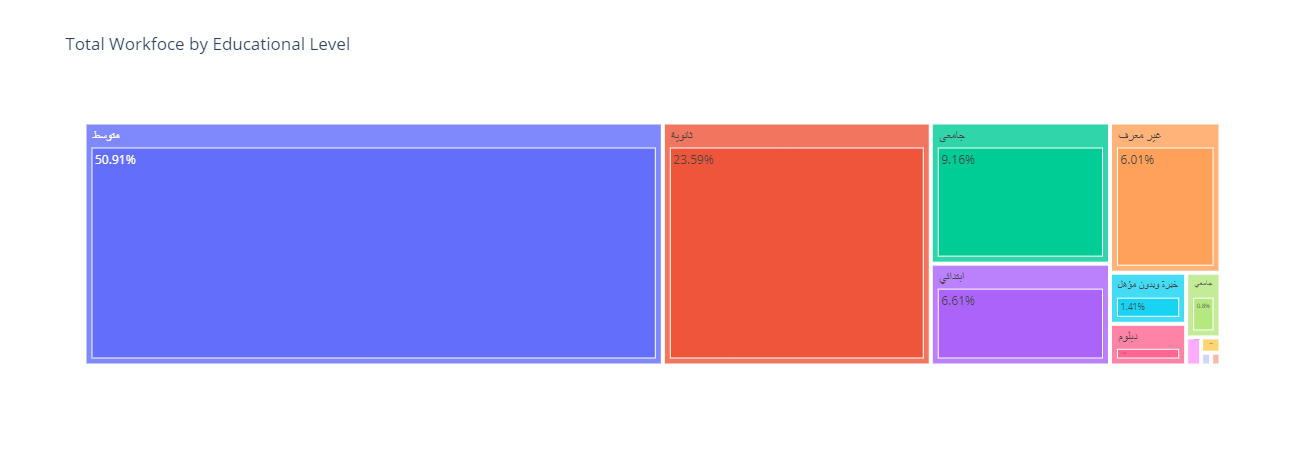

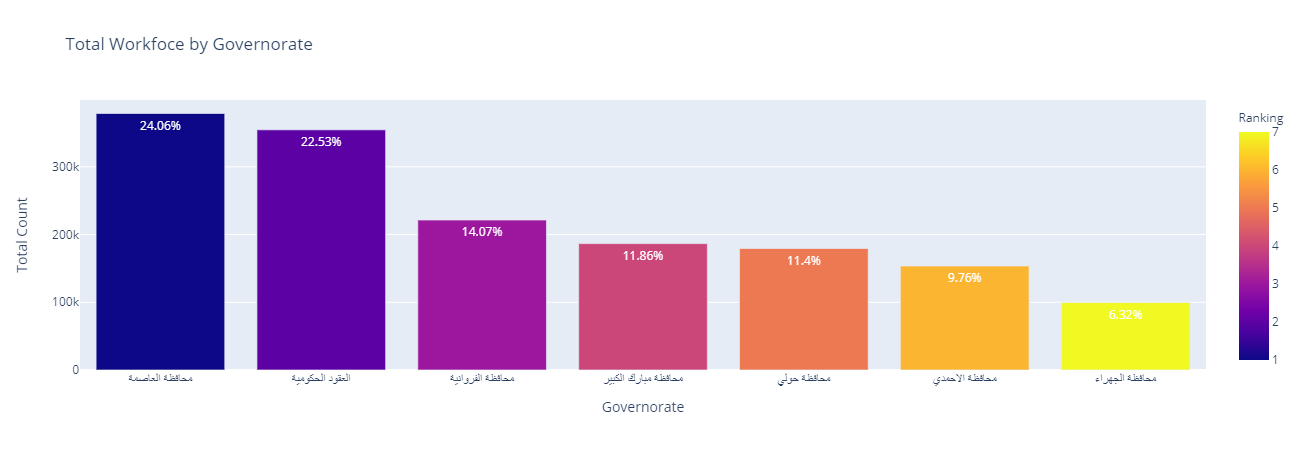

In [98]:
#hide_input

e = dict(data['Educational Level'].value_counts())
insight14 = pd.DataFrame()
e = dict(sorted(e.items(), key=operator.itemgetter(1), reverse=True)[:15])
insight14['Educational Level'] = e.keys()
insight14['Educational Level'] = insight14['Educational Level'].replace(r'^\s*$', "--", regex=True)
insight14['Total Count'] = e.values()
insight14['Percentage'] = ((insight14['Total Count'] / 1574040)*100).round(2)
insight14['Percentage'] = insight14['Percentage'].astype(str) + '%'
fig5 = px.treemap(insight14, path=['Educational Level','Percentage'], values='Total Count',title = "Total Workfoce by Educational Level")
fig5.show()

f = dict(data['Governorate'].value_counts())
insight15 = pd.DataFrame()
f = dict(sorted(f.items(), key=operator.itemgetter(1), reverse=True)[:7])
insight15['Governorate'] = f.keys()
insight15['Total Count'] = f.values()
insight15['Ranking'] = insight15.index+1
insight15['Percentage'] = ((insight15['Total Count'] / 1574040)*100).round(2)
insight15['Percentage'] = insight15['Percentage'].astype(str) + '%'
fig = px.bar(insight15,x="Governorate",y="Total Count",color="Ranking",text="Percentage",title = "Total Workfoce by Governorate")
fig.show()

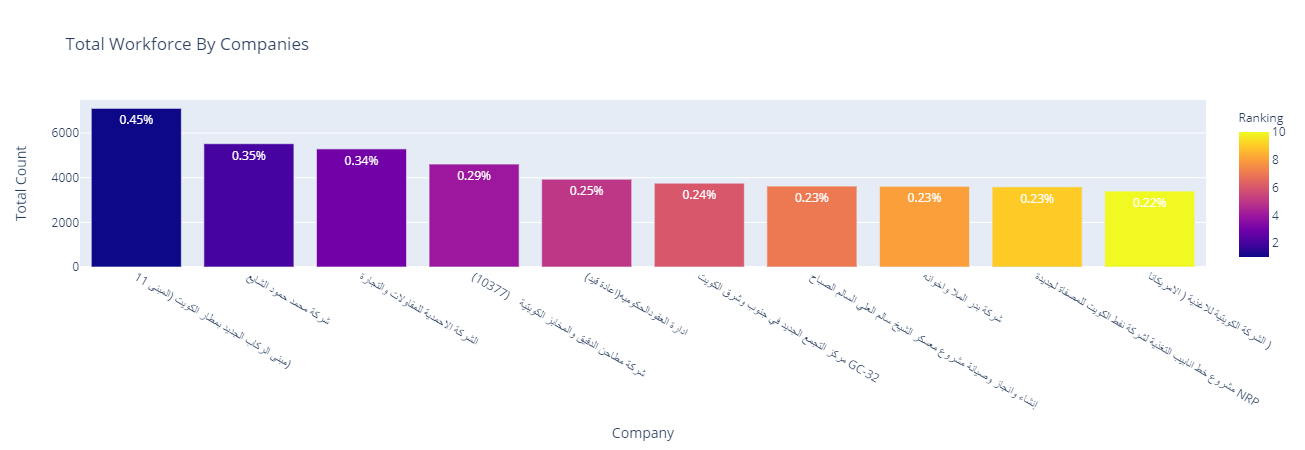

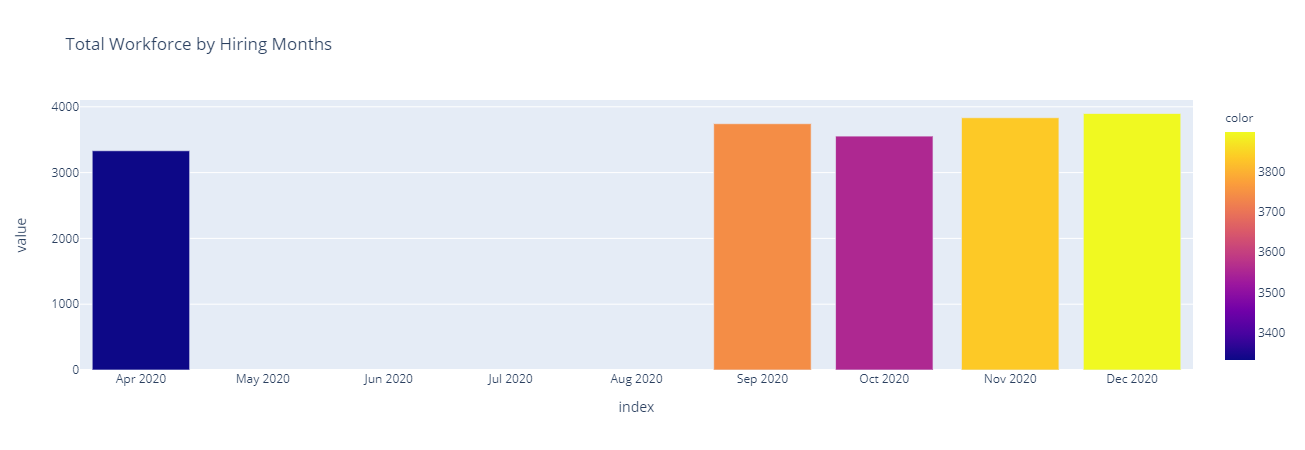

In [99]:
#hide_input

h = dict(data['Company'].value_counts())
insight17 = pd.DataFrame()
h = dict(sorted(h.items(), key=operator.itemgetter(1), reverse=True)[:10])
insight17['Company'] = h.keys()
insight17['Total Count'] = h.values()
insight17['Ranking'] = insight17.index+1
insight17['Percentage'] = ((insight17['Total Count'] / 1574040)*100).round(2)
insight17['Percentage'] = insight17['Percentage'].astype(str) + '%'
fig8 = px.bar(insight17,x="Company",y="Total Count",color="Ranking",text="Percentage",title = "Total Workforce By Companies")
fig8.show()

top_5_HIRE_DATE = data['Hire Date'].value_counts().head(5)
fig9 = px.bar(top_5_HIRE_DATE, title = 'Total Workforce by Hiring Months',color=top_5_HIRE_DATE)
fig9.show()

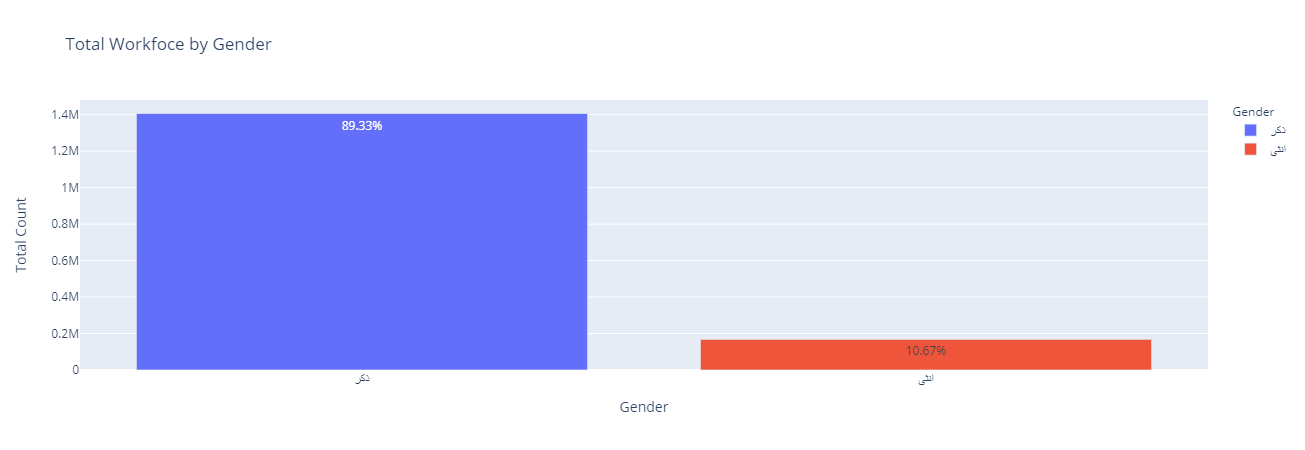

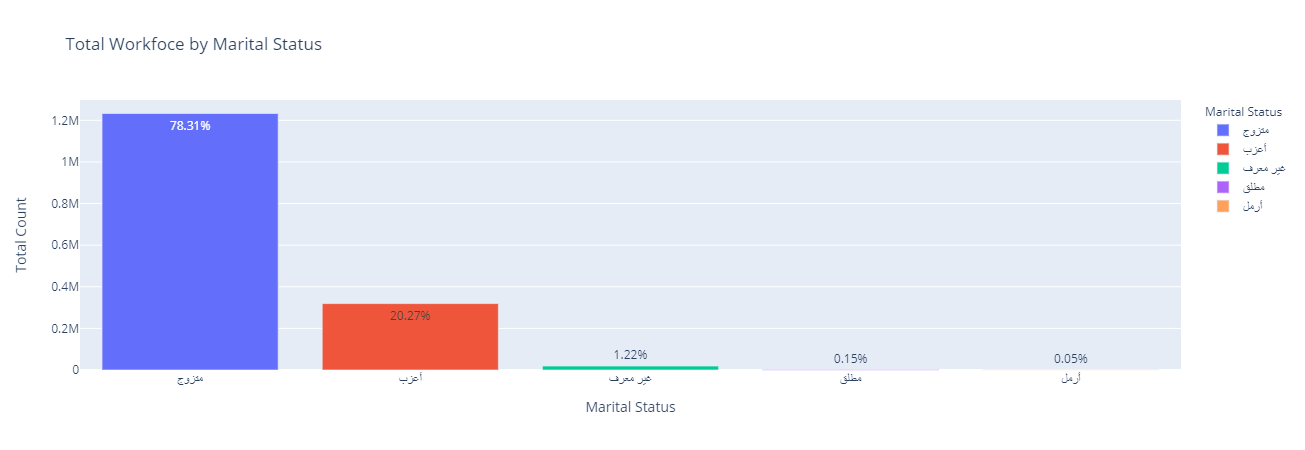

In [100]:
#hide_input

l = dict(data['Gender'].value_counts())
insight20 = pd.DataFrame()
l = dict(sorted(l.items(), key=operator.itemgetter(1), reverse=True)[:2])
insight20['Gender'] = l.keys()
insight20['Total Count'] = l.values()
insight20['Percentage'] = ((insight20['Total Count'] / 1574040)*100).round(2)
insight20['Percentage'] = insight20['Percentage'].astype(str) + '%'
fig21 = px.bar(insight20,x="Gender",y="Total Count",color="Gender",text="Percentage",title = "Total Workfoce by Gender")
fig21.show()


g = dict(data['Marital Status'].value_counts())
insight16 = pd.DataFrame()
g = dict(sorted(g.items(), key=operator.itemgetter(1), reverse=True)[:6])
insight16['Marital Status'] = g.keys()
#insight16['Marital Status'] = insight16['Marital Status'].replace(r'^\s*$', " -- ", regex=True)
insight16['Total Count'] = g.values()
insight16['Percentage'] = ((insight16['Total Count'] / 1574040)*100).round(2)
insight16['Percentage'] = insight16['Percentage'].astype(str) + '%'
fig7 = px.bar(insight16,x="Marital Status",y="Total Count",color="Marital Status",text="Percentage",title = "Total Workfoce by Marital Status")
fig7.show()

# Insight 24: Workforce by Salary

In [101]:
#hide_input

bins = [0,201,301,401,501,1001,2001,3001,4001, 5001, 10000, 15000, 20000, 25000, 25001] 
labels = ['0-200','201-300','301-400','401-500','501-100','1001-2000','2001-3000','3001-4000','4001-5000','5001-10000','10001-15000', '15001-20000', '20001-25000', 'Above 25000']
data['Salary Range'] = pd.cut(data.Salary, bins, labels = labels)

In [102]:
#hide_input

a = dict(data['Salary Range'].value_counts())
insight24 = pd.DataFrame()
a = dict(sorted(a.items(), key=operator.itemgetter(1), reverse=True)[:20])
insight24['Salary Range'] = a.keys()
insight24['Total Count'] = a.values()
insight24['Percentage'] = ((insight24['Total Count'] / 1574040)*100).round(2) 
insight24['Percentage'] = insight24['Percentage'].astype(str) + '%'
insight24.style.background_gradient(cmap='Reds')

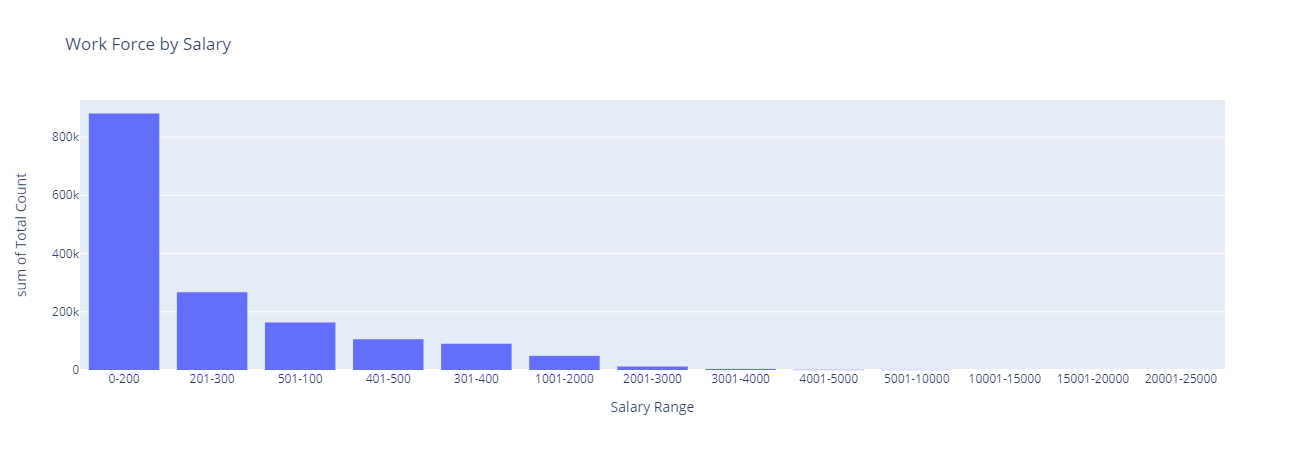

In [103]:
#hide_input

fig = px.histogram(insight24, x="Salary Range", y= "Total Count",title ="Work Force by Salary")
fig.show()

# Insight 25: Workforce Salary by Category

In [104]:
#hide_input

data['COUNTER'] = 1
insight25 = data.groupby(['Salary Range','Category'])['COUNTER'].agg(['count'])
insight25['Percentage'] = ((insight25['count'] / 1574040)*100).round(2) 
insight25['Percentage'] = insight25['Percentage'].astype(str) + '%'
insight25.style.background_gradient(cmap='Reds')

In [105]:
#hide_input

insight25 = insight25.reset_index("Category")
kuwait_df = insight25[insight25['Category'] == 'Kuwaiti']

kuwait_df.style.background_gradient(cmap='Reds')

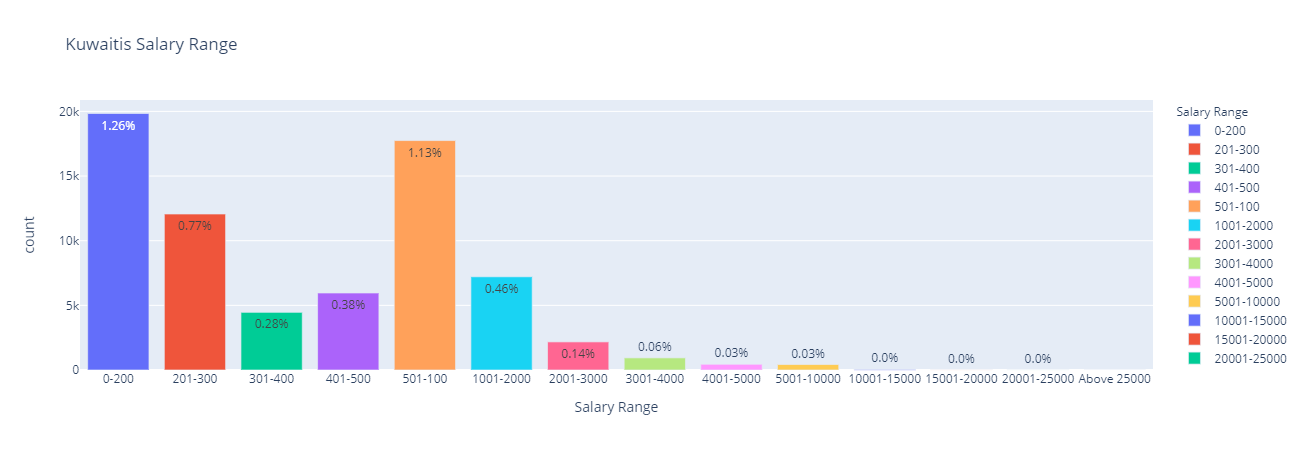

In [106]:
#hide_input

fig = px.bar(kuwait_df,x=kuwait_df.index, y="count", hover_data = kuwait_df.columns,color=kuwait_df.index,text="Percentage",
             title = "Kuwaitis Salary Range")
fig.show()

In [107]:
#hide_input

non_kuwait_df = insight25[insight25['Category'] == 'Non-Kuwaiti']
non_kuwait_df.style.background_gradient(cmap='Reds')

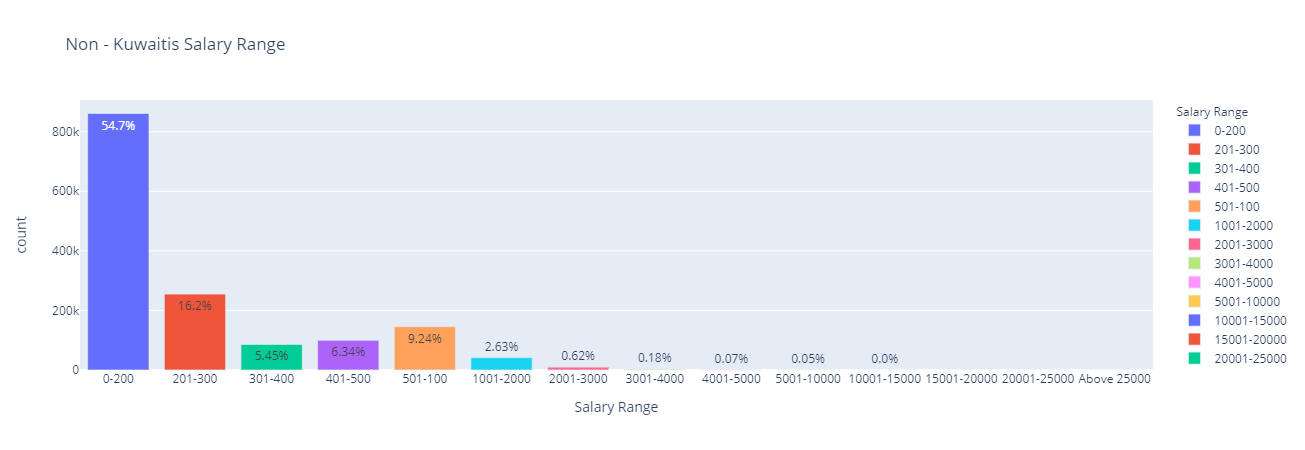

In [108]:
#hide_input

fig = px.bar(non_kuwait_df,x=non_kuwait_df.index, y="count", hover_data = non_kuwait_df.columns,color=non_kuwait_df.index,
             text="Percentage", title = "Non - Kuwaitis Salary Range")
fig.show()

### Insight 26 : What are the Occupations that are held by Non-Kuwaitis those will be reaching the age of 60 in next 5 Years which can be replaced by Kuwaitis

In [109]:
#hide_input

data['COUNTER'] = 1
insight26 = data.groupby(["Category","Occupation","Educational Level","Age"])['COUNTER'].agg(['count'])
insight26['Percentage'] = ((insight26['count'] / 1574040)*100).round(2) 
insight26['Percentage'] = insight26['Percentage'].astype(str) + '%'
insight26 = insight26.reset_index(["Category","Occupation","Educational Level","Age"])

In [110]:
#hide_input

kuwait_df = insight26[insight26['Category'] == 'Kuwaiti']


In [111]:
#hide_input

non_kuwait_df = insight26[insight26['Category'] == 'Non-Kuwaiti']

In [112]:
#hide_input

x = non_kuwait_df[(non_kuwait_df['Occupation'].isin(kuwait_df['Occupation']))] 
y = non_kuwait_df[(non_kuwait_df['Educational Level'].isin(kuwait_df['Educational Level']))] 


In [113]:
rslt_df = x.merge(y, how = 'inner' ,indicator=False)


In [114]:
rslt_df['Percentage'] = ((rslt_df['count'] / 1574040)*100).round(2)


In [115]:
rslt_df['Percentage'] = rslt_df['Percentage'].astype(str) + '%'


In [116]:
#hide_input
five_years_to_be_sixty = rslt_df[rslt_df['Age'] == 55]
five_to_sixty = len(five_years_to_be_sixty)
pd.crosstab([five_years_to_be_sixty['Occupation'], five_years_to_be_sixty['count']],[five_years_to_be_sixty['Educational Level']],margins=True)

Educational Level           ابتدائي  جامعى  جامعي  غير معرف  متوسط   All
Occupation           count                                              
أخصائى اجتماعى       1            1      0      1         0      0     2
                     5            0      1      0         0      0     1
أخصائى تجميل         1            0      0      0         0      1     1
أخصائى تقنيات تربوية 1            0      0      0         0      1     1
أخصائى مالى          1            0      1      0         0      0     1
...                             ...    ...    ...       ...    ...   ...
وسيط تأمين           2            0      0      0         0      1     1
وسيط عقارات          1            0      1      0         0      0     1
                     4            0      0      0         0      1     1
وكيل مدرسة           1            0      0      1         0      0     1
All                             194    298    139        96    361  1088

[983 rows x 6 columns]

In [117]:
#hide_input

four_years_to_be_sixty = rslt_df[rslt_df['Age'] == 56]
four_to_sixty = len(five_years_to_be_sixty)
pd.crosstab([four_years_to_be_sixty['Occupation'], four_years_to_be_sixty['count']],[four_years_to_be_sixty['Educational Level']],margins=True)

Educational Level         ابتدائي  جامعى  جامعي  غير معرف  متوسط   All
Occupation         count                                              
أخصائى اجتماعى     2            0      0      1         0      0     1
                   3            0      1      0         0      0     1
أخصائى تجميل       1            1      0      0         0      1     2
أخصائى دعاية       1            0      0      0         0      1     1
أخصائى شئون ادارية 1            1      0      0         0      0     1
...                           ...    ...    ...       ...    ...   ...
نائب مدير عام      2            0      1      0         0      0     1
واعظ               1            0      0      1         0      0     1
وسيط تأمين         1            0      1      1         0      0     2
وسيط عقارات        2            0      0      0         0      1     1
All                           179    287    125        77    336  1004

[890 rows x 6 columns]

In [118]:
#hide_input

three_years_to_be_sixty = rslt_df[rslt_df['Age'] == 57] 
three_to_sixty = len(three_years_to_be_sixty)
pd.crosstab([three_years_to_be_sixty['Occupation'], three_years_to_be_sixty['count']],[three_years_to_be_sixty['Educational Level']],margins=True)


Educational Level         ابتدائي  جامعى  جامعي  غير معرف  متوسط  All
Occupation         count                                             
أخصائى اجتماعى     4            0      1      0         0      0    1
أخصائى تجميل       1            0      0      0         0      1    1
أخصائى شئون ادارية 1            0      0      0         0      1    1
أخصائى علاج طبيعى  1            0      0      1         1      0    2
أخصائى مالى        1            0      1      0         0      0    1
...                           ...    ...    ...       ...    ...  ...
وسيط بيع           1            0      0      1         0      0    1
وسيط عقارات        1            0      1      0         0      0    1
                   5            0      0      0         0      1    1
وكيل مدرسة         1            0      0      1         0      0    1
All                           174    274    133        73    329  983

[866 rows x 6 columns]

In [119]:
#hide_input

two_years_to_be_sixty = rslt_df[rslt_df['Age'] == 58]
two_to_sixty = len(two_years_to_be_sixty)
pd.crosstab([two_years_to_be_sixty['Occupation'], two_years_to_be_sixty['count']],[two_years_to_be_sixty['Educational Level']],margins=True)


Educational Level        ابتدائي  جامعى  جامعي  غير معرف  متوسط  All
Occupation        count                                             
أخصائى اجتماعى    1            0      0      1         0      0    1
                  5            0      1      0         0      0    1
أخصائى ادارى      1            0      1      0         0      0    1
أخصائى تجميل      1            0      1      0         0      0    1
أخصائى علاج طبيعى 2            0      1      0         0      0    1
...                          ...    ...    ...       ...    ...  ...
وسيط بيع          2            0      0      1         0      1    2
وسيط تأمين        1            0      1      0         0      0    1
                  2            0      0      0         0      1    1
وسيط عقارات       1            1      0      0         0      1    2
All                          162    254    122        71    316  925

[821 rows x 6 columns]

In [120]:
#hide_input

one_year_to_be_sixty = rslt_df[rslt_df['Age'] == 59]
one_to_sixty = len(one_year_to_be_sixty)
pd.crosstab([one_year_to_be_sixty['Occupation'], one_year_to_be_sixty['count']],[one_year_to_be_sixty['Educational Level']],margins=True)


Educational Level     ابتدائي  جامعى  جامعي  غير معرف  متوسط  All
Occupation     count                                             
أخصائى أسنان   1            0      1      0         0      0    1
أخصائى اجتماعى 3            0      1      0         0      0    1
أخصائى ادارى   1            0      0      1         0      0    1
أخصائى تجميل   2            0      0      0         0      1    1
أمين خزينة     1            0      0      0         0      1    1
...                       ...    ...    ...       ...    ...  ...
وسيط بيع       1            0      0      0         0      1    1
وسيط عقارات    4            0      0      0         0      1    1
وكيل تأمين     1            0      0      1         0      0    1
وكيل مدرسة     1            1      1      0         0      0    2
All                       162    252    124        70    296  904

[795 rows x 6 columns]

In [121]:
#hide_input

sixty_years = rslt_df[rslt_df['Age'] == 60]
exact_sixty_years = len(sixty_years)
pd.crosstab([sixty_years['Occupation'], sixty_years['count']],[sixty_years['Educational Level']],margins=True)

Educational Level        ابتدائي  جامعى  جامعي  غير معرف  متوسط  All
Occupation        count                                             
أخصائى اجتماعى    1            0      0      1         0      0    1
                  3            0      1      0         0      0    1
أخصائى تجميل      2            0      0      0         0      1    1
أخصائى تغذية      1            0      0      0         0      1    1
أخصائى علاج طبيعى 1            0      1      0         0      0    1
...                          ...    ...    ...       ...    ...  ...
نائب مدير         1            0      1      0         0      0    1
نائب مدير عام     1            0      1      0         0      1    2
وسيط عقارات       1            0      0      0         0      1    1
وكيل مدرسة        1            0      1      1         0      0    2
All                          139    227     99        60    275  800

[715 rows x 6 columns]

In [122]:
#hide_input

#Performing calcualtions on the above dataframes
total_people = five_to_sixty + four_to_sixty + three_to_sixty + two_to_sixty + one_to_sixty + exact_sixty_years

f_to_sixty = (five_to_sixty / total_people)*100
fo_to_sixty = (four_to_sixty / total_people)*100
t_to_sixty = (three_to_sixty / total_people)*100
tw_to_sixty = (two_to_sixty / total_people)*100
o_to_sixty = (one_to_sixty / total_people)*100
sixty = (exact_sixty_years / total_people)*100

total = [five_to_sixty,four_to_sixty,three_to_sixty,two_to_sixty,one_to_sixty,exact_sixty_years]
percentage = [f_to_sixty,fo_to_sixty,t_to_sixty,tw_to_sixty,o_to_sixty,sixty]

resultant = pd.concat([five_years_to_be_sixty,four_years_to_be_sixty,three_years_to_be_sixty,two_years_to_be_sixty,one_year_to_be_sixty,sixty_years], axis=0)
resultant

Category            Occupation Educational Level   Age  count  \
14     Non-Kuwaiti        أخصائى اجتماعى           ابتدائي  55.0      1   
46     Non-Kuwaiti        أخصائى اجتماعى             جامعى  55.0      5   
61     Non-Kuwaiti        أخصائى اجتماعى             جامعي  55.0      1   
184    Non-Kuwaiti          أخصائى تجميل             متوسط  55.0      1   
226    Non-Kuwaiti  أخصائى تقنيات تربوية             متوسط  55.0      1   
...            ...                   ...               ...   ...    ...   
49999  Non-Kuwaiti         نائب مدير عام             جامعى  60.0      1   
50024  Non-Kuwaiti         نائب مدير عام             متوسط  60.0      1   
50254  Non-Kuwaiti           وسيط عقارات             متوسط  60.0      1   
50279  Non-Kuwaiti            وكيل مدرسة             جامعى  60.0      1   
50289  Non-Kuwaiti            وكيل مدرسة             جامعي  60.0      1   

      Percentage  
14          0.0%  
46          0.0%  
61          0.0%  
184         0.0%  
226         0.0%  
...          ...  
49999       0.0%  
50024       0.0%  
50254       0.0%  
50279       0.0%  
50289       0.0%  

[5704 rows x 6 columns]

In [123]:
#hide_input

resultant1 = resultant.nlargest(20,'count')
pd.crosstab([resultant['Occupation'], resultant['count']],[resultant['Age']],margins=True)

Age                   55.0  56.0  57.0  58.0  59.0  60.0   All
Occupation     count                                          
أخصائى أسنان   1         0     0     0     0     1     0     1
أخصائى اجتماعى 1         2     0     0     1     0     1     4
               2         0     1     0     0     0     0     1
               3         0     1     0     0     1     1     3
               4         0     0     1     0     0     0     1
...                    ...   ...   ...   ...   ...   ...   ...
وسيط عقارات    4         1     0     0     0     1     0     2
               5         0     0     1     0     0     0     1
وكيل تأمين     1         0     0     0     0     1     0     1
وكيل مدرسة     1         1     0     1     0     2     2     6
All                   1088  1004   983   925   904   800  5704

[2872 rows x 7 columns]

In [124]:
#hide_input

insight38 = pd.DataFrame()
insight38['Year'] = ['2021','2022','2023','2024','2025','2026']
insight38['Total Count'] = total
insight38['Percentage'] = percentage
insight38['Percentage'] = insight38['Percentage'].round(2)
insight38['Percentage'] = insight38['Percentage'].astype(str) + '%'
insight38

Year  Total Count Percentage
0  2021         1088      18.8%
1  2022         1088      18.8%
2  2023          983     16.98%
3  2024          925     15.98%
4  2025          904     15.62%
5  2026          800     13.82%

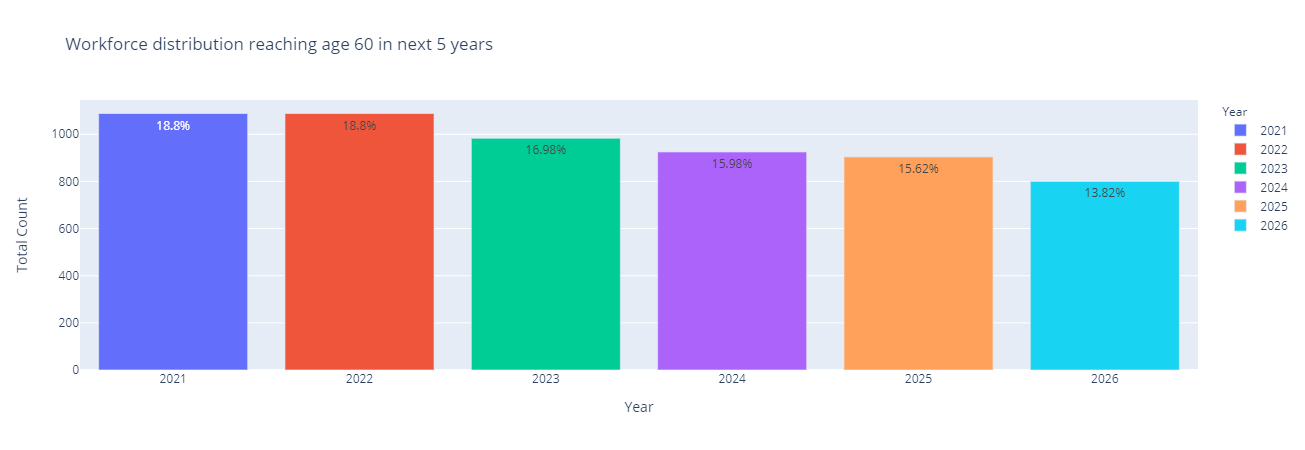

In [125]:
#hide_input
fig = px.bar(insight38,x="Year", y="Total Count", hover_data = insight38.columns, color="Year",
            text = "Percentage",title = "Workforce distribution reaching age 60 in next 5 years")
fig.show()

In [126]:
#hide_input 

a = resultant['Occupation'].unique()
print("\nOccupations held by Non-Kuwaitis those will be reaching the age of 60 in next 5 Years can be replaced by Kuwaitis:  ",len(a))
a[0:753]


Occupations held by Non-Kuwaitis those will be reaching the age of 60 in next 5 Years can be replaced by Kuwaitis:   753


array(['أخصائى اجتماعى', 'أخصائى تجميل', 'أخصائى تقنيات تربوية',
       'أخصائى مالى', 'أمين صندوق', 'أمين مخزن', 'أمين مكتبة',
       'اختصاصي قانوني', 'اخصائى اول تكنولوجيا المعلومات', 'اخصائي اداري',
       'اخصائي التطوير الأداري', 'ادارى شبكة المعلومات', 'اداري مشتريات',
       'استاذ جامعة', 'استشاري جراحة تجميل', 'امين سر مجلس ادارة', 'بائع',
       'بائع أقمشة', 'بائع سيارات', 'باحث ادارى', 'باحث تسويق',
       'باحث قانونى', 'بحار', 'براد أنابيب', 'جيو فيزيائى', 'جيولوجى',
       'حارس', 'حارس أمن', 'حاسب كميات', 'حفار', 'حلاق رجال', 'حلوانى',
       'خياط', 'خياط سيدات', 'رئيس تنفيذى', 'رئيس حسابات', 'رئيس سفرجية',
       'رئيس طباخين', 'رئيس عمال', 'رئيس قسم', 'رئيس قسم الخدمات المالية',
       'رئيس محاسبة', 'رئيس مدققين', 'رسام', 'رسام / خرائط',
       'رسام / معمارى', 'رسام هندسى', 'سائق سيارة', 'سائق شاحنة',
       'سائق مركبة', 'سائق مركبه خفيفه', 'سائق معدات ثقيلة',
       'سائق نقل ثقيل', 'سائق نقل خفيف', 'سكرتير', 'سكرتير إدارى',
       'سكرتير تنفيذى', 'سمسار عقار',

### Insight 27: What/Who are the Employers Those who hire most of the Non-Kuwaitis and can be replaced by Kuwaitis

In [127]:
#hide_input

insight26 = data.groupby(['Company','Category','Age Group']).size().unstack(level=2, fill_value=0)

In [128]:
#hide_input

insight26 = (insight26.stack().reset_index(name='Total Count'))

In [129]:
#hide_input

kuwait_df = insight26[insight26['Category'] == 'Kuwaiti']

In [130]:
#hide_input

kuwait_df['Percentage'] = ((kuwait_df['Total Count'] / 1574040)*100).round(2)
kuwait_df['Percentage'] = kuwait_df['Percentage'].astype(str) + '%'
kuwait = kuwait_df.nlargest(20,'Total Count')
kuwait.set_index("Age Group")

Company Category  Total Count Percentage
Age Group                                                                
36-40                بيت التمويل الكويتي  Kuwaiti          633      0.04%
36-40                  بنك الكويت الوطنى  Kuwaiti          565      0.04%
31-35                بيت التمويل الكويتي  Kuwaiti          497      0.03%
31-35                  بنك الكويت الوطنى  Kuwaiti          448      0.03%
36-40                         بنك الخليج  Kuwaiti          414      0.03%
36-40                         بنك بوبيان  Kuwaiti          321      0.02%
31-35                         بنك الخليج  Kuwaiti          318      0.02%
41-45                بيت التمويل الكويتي  Kuwaiti          264      0.02%
26-30                  بنك الكويت الوطنى  Kuwaiti          250      0.02%
36-40            شركة الاتصالات المتنقلة  Kuwaiti          221      0.01%
36-40              البنك التجاري الكويتي  Kuwaiti          218      0.01%
46-50                بيت التمويل الكويتي  Kuwaiti          208      0.01%
36-40               البنك الاهلي الكويتي  Kuwaiti          204      0.01%
31-35                         بنك بوبيان  Kuwaiti          202      0.01%
26-30                بيت التمويل الكويتي  Kuwaiti          191      0.01%
36-40                          بنك برقان  Kuwaiti          190      0.01%
41-45                  بنك الكويت الوطنى  Kuwaiti          180      0.01%
36-40         شركة ناقلات النفط الكويتية  Kuwaiti          178      0.01%
26-30                         بنك بوبيان  Kuwaiti          177      0.01%
46-50      شركة البترول الوطنية الكويتية  Kuwaiti          174      0.01%

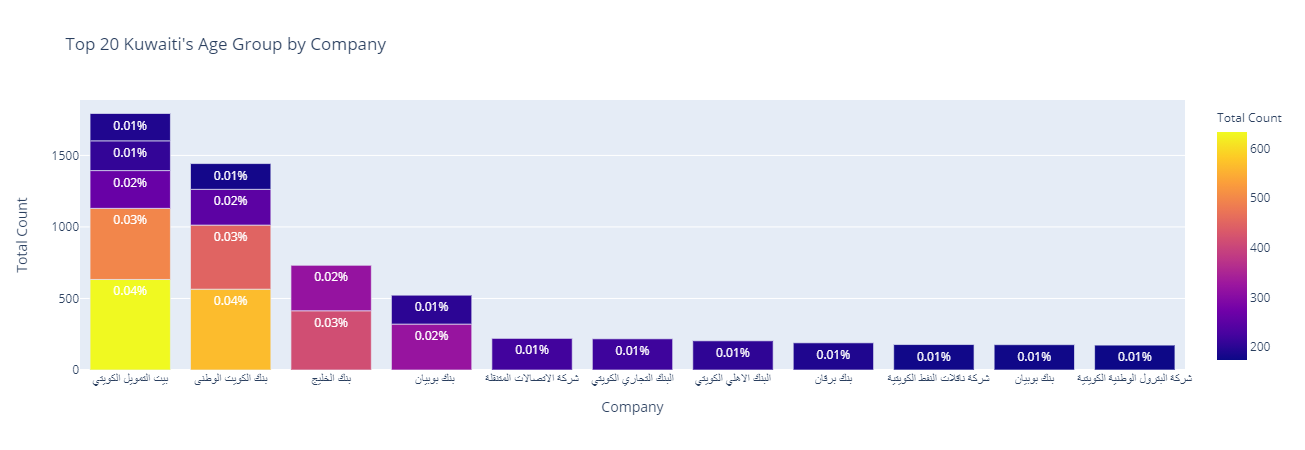

In [131]:
#hide_input

fig = px.bar(kuwait,x="Company", y="Total Count", hover_data = kuwait.columns, text="Percentage",color = "Total Count",
             barmode='group',title = "Top 20 Kuwaiti's Age Group by Company")
fig.show()

In [132]:
#hide_input

non_kuwait_df = insight26[insight26['Category'] == 'Non-Kuwaiti']

In [133]:
#hide_input

non_kuwait_df['Percentage'] = ((non_kuwait_df['Total Count'] / 1574040)*100).round(2)
non_kuwait_df['Percentage'] = non_kuwait_df['Percentage'].astype(str) + '%'
non_kuwait = non_kuwait_df.nlargest(20,'Total Count')
non_kuwait.set_index("Age Group")

Company     Category  \
Age Group                                                                   
36-40            مبنى الركاب الجديد بمطار الكويت (المبنى 11)  Non-Kuwaiti   
36-40                                  شركة محمد حمود الشايع  Non-Kuwaiti   
31-35            مبنى الركاب الجديد بمطار الكويت (المبنى 11)  Non-Kuwaiti   
36-40      إنشاء وانجاز وصيانة مشروع معسكر الشيخ سالم الع...  Non-Kuwaiti   
46-50            مبنى الركاب الجديد بمطار الكويت (المبنى 11)  Non-Kuwaiti   
36-40                     الشركة الاحمدية للمقاولات والتجارة  Non-Kuwaiti   
41-45            مبنى الركاب الجديد بمطار الكويت (المبنى 11)  Non-Kuwaiti   
36-40           مركز التجمع الجديد في جنوب وشرق الكويت GC-32  Non-Kuwaiti   
36-40         (10377)    شركة مطاحن الدقيق والمخابز الكويتية  Non-Kuwaiti   
36-40      مشروع خط انابيب التغذية لشركة نفط الكويت للمصف...  Non-Kuwaiti   
41-45                                  شركة محمد حمود الشايع  Non-Kuwaiti   
46-50                        (ادارة العقودالحكوميه(اعادة قيد  Non-Kuwaiti   
36-40                 الشركة الكويتية للاغذية ( الامريكانا )  Non-Kuwaiti   
36-40      الهندسة والتوريد والانشاء والاعداد والتشغيل لم...  Non-Kuwaiti   
36-40                        (ادارة العقودالحكوميه(اعادة قيد  Non-Kuwaiti   
36-40                             الشركة المتكاملة اللوجستية  Non-Kuwaiti   
36-40                                 شركة بدر الملا واخوانه  Non-Kuwaiti   
46-50                                           شركة تنظيفكو  Non-Kuwaiti   
46-50                     الشركة الاحمدية للمقاولات والتجارة  Non-Kuwaiti   
46-50                                  شركة محمد حمود الشايع  Non-Kuwaiti   

           Total Count Percentage  
Age Group                          
36-40             1947      0.12%  
36-40             1810      0.11%  
31-35             1245      0.08%  
36-40             1167      0.07%  
46-50             1153      0.07%  
36-40             1152      0.07%  
41-45             1145      0.07%  
36-40             1118      0.07%  
36-40             1109      0.07%  
36-40             1093      0.07%  
41-45             1066      0.07%  
46-50             1035      0.07%  
36-40             1020      0.06%  
36-40             1013      0.06%  
36-40              999      0.06%  
36-40              960      0.06%  
36-40              930      0.06%  
46-50              919      0.06%  
46-50              899      0.06%  
46-50              897      0.06%

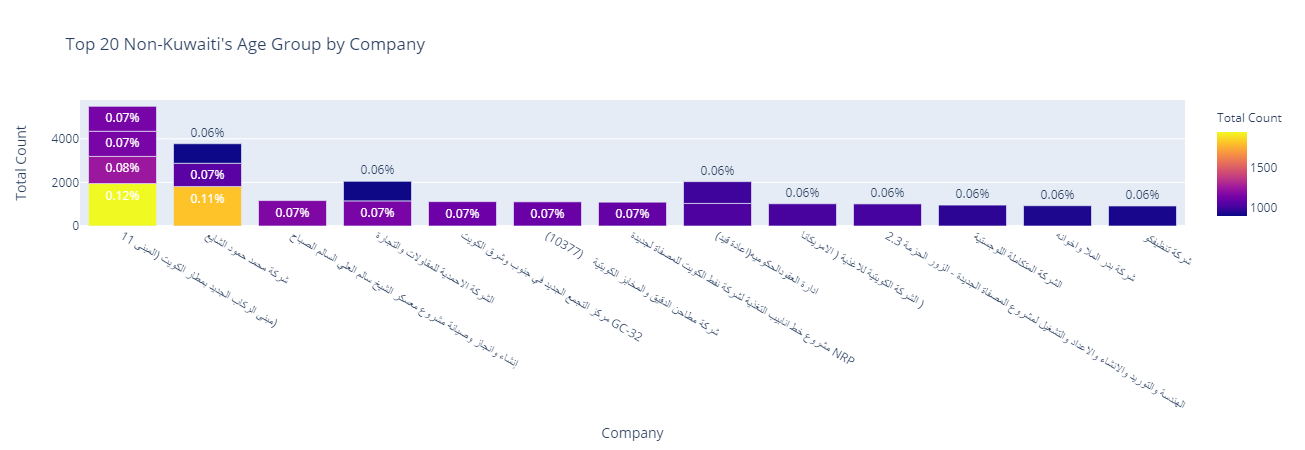

In [134]:
#hide_input

fig = px.bar(non_kuwait,x="Company", y="Total Count", hover_data = non_kuwait_df.columns,color="Total Count", text="Percentage",
             barmode='group',title = "Top 20 Non-Kuwaiti's Age Group by Company")
fig.show()

In [135]:
#hide_input

rslt = non_kuwait_df[non_kuwait_df['Company'].isin(kuwait_df['Company'])]
rslt1 = rslt.nlargest(10,'Total Count')
rslt1.set_index('Age Group')

Company     Category  \
Age Group                                                                   
36-40            مبنى الركاب الجديد بمطار الكويت (المبنى 11)  Non-Kuwaiti   
36-40                                  شركة محمد حمود الشايع  Non-Kuwaiti   
31-35            مبنى الركاب الجديد بمطار الكويت (المبنى 11)  Non-Kuwaiti   
36-40      إنشاء وانجاز وصيانة مشروع معسكر الشيخ سالم الع...  Non-Kuwaiti   
46-50            مبنى الركاب الجديد بمطار الكويت (المبنى 11)  Non-Kuwaiti   
36-40                     الشركة الاحمدية للمقاولات والتجارة  Non-Kuwaiti   
41-45            مبنى الركاب الجديد بمطار الكويت (المبنى 11)  Non-Kuwaiti   
36-40           مركز التجمع الجديد في جنوب وشرق الكويت GC-32  Non-Kuwaiti   
36-40         (10377)    شركة مطاحن الدقيق والمخابز الكويتية  Non-Kuwaiti   
36-40      مشروع خط انابيب التغذية لشركة نفط الكويت للمصف...  Non-Kuwaiti   

           Total Count Percentage  
Age Group                          
36-40             1947      0.12%  
36-40             1810      0.11%  
31-35             1245      0.08%  
36-40             1167      0.07%  
46-50             1153      0.07%  
36-40             1152      0.07%  
41-45             1145      0.07%  
36-40             1118      0.07%  
36-40             1109      0.07%  
36-40             1093      0.07%

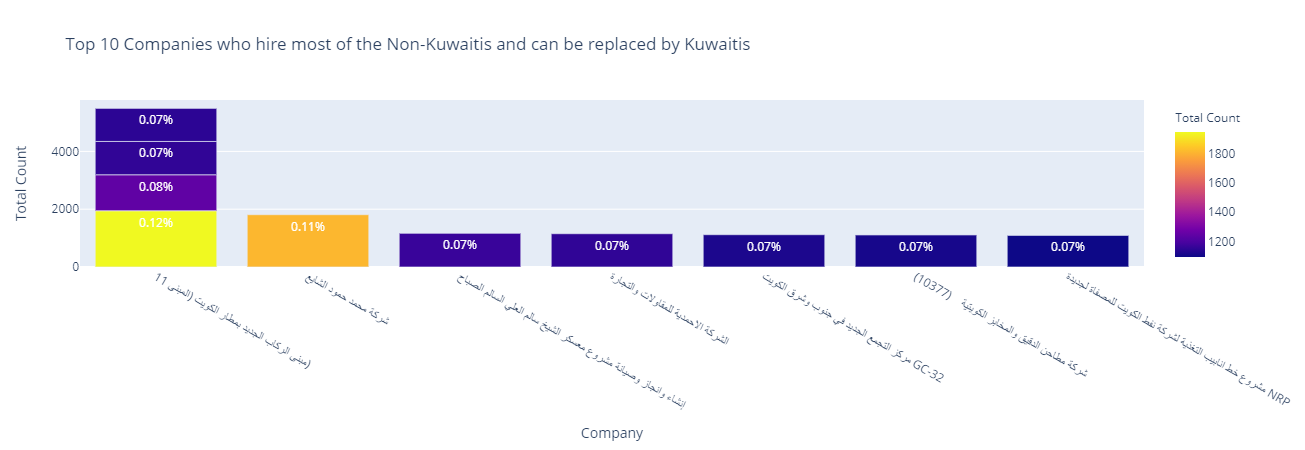

In [136]:
#hide_input

fig = px.bar(rslt1, x="Company", y="Total Count",barmode='group',text="Percentage",color="Total Count",
             title ="Top 10 Companies who hire most of the Non-Kuwaitis and can be replaced by Kuwaitis")
fig.show()

In [137]:
#hide_input

a = rslt['Company'].unique()
print("\n Number of Unique Companies that hire most of the Non-Kuwaitis :  ",len(a))

print("\n\n\n 1000 Companies that hire most of the Non-Kuwaitis \n\n")
a[0:100]


 Number of Unique Companies that hire most of the Non-Kuwaitis :   122145



 1000 Companies that hire most of the Non-Kuwaitis 




array(['                                                   عقد خدمات توريد العماله  المهنيية لعمليات الخفجي المشتركة',
       '                                    مطعم  مرمر',
       '                                   عقار طاهراحمدعلي بوحمد',
       '                                   معهدالنجاح الأهلي',
       '                                  اكشن موديل للازياء',
       '                                  مطعم لوزان',
       '                              مطعم  اورينتال',
       '                             بقالة دار الزهراء',
       '                             مؤسسة ماي فون للاتصالات والاجهزه الكهربائيه والالكترونية',
       '                            بيتزا اكسبرس',
       '                            ستابيلو',
       '                            شركة صيدليه التوفيق',
       '                            ميداس ديزاين سنتر',
       '                           مؤسسة الجناح الالكترونيه',
       '                          شركة البحرين للصيرفة',
       '                          مطع